In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


In [2]:
day = pd.read_csv('day.csv')
day['temp'] = day['temp'] * 47 -8  # These conversions convert from standardized values to original values
day['atemp'] = day['atemp'] * 66 -16
day['hum'] = day['hum'] * 100
day['windspeed'] = day['windspeed'] * 67
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,15.283085,15.307363,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,8.603397,10.755438,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-5.220871,-10.781406,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,7.842925,6.297605,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,15.421651,16.124378,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,22.804575,24.167732,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,32.498349,39.499136,97.250000,34.000021,3410.000000,6946.000000,8714.000000


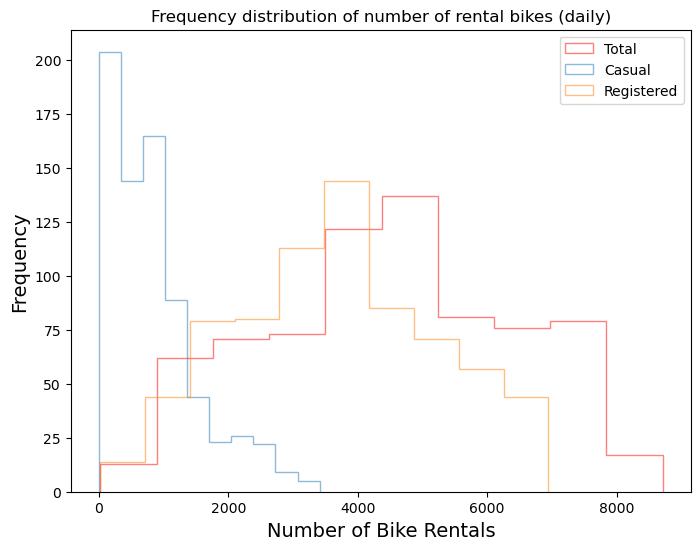

In [10]:
#Draw a histogram of cnt values
plt.figure(figsize=(8,6))
plt.hist(day['cnt'],histtype='step', bins=10, alpha=0.5, label="Total",color = 'red')
plt.hist(day['casual'],histtype='step', bins=10, alpha=0.5, label="Casual")
plt.hist(day['registered'],histtype='step', bins=10, alpha=0.5, label="Registered")
plt.xlabel("Number of Bike Rentals", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency distribution of number of rental bikes (daily)")
plt.legend(loc='upper right');

In [3]:
hour = pd.read_csv('hour.csv')
hour['temp'] = hour['temp'] * 47 -8  # These conversions are for converting from standardized values to original values.
hour['atemp'] = hour['atemp'] * 66 -16
hour['hum'] = hour['hum'] * 100
hour['windspeed'] = hour['windspeed'] * 67
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,15.358397,15.401157,62.722884,12.736540,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,9.050138,11.342114,19.292983,8.196795,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.060000,-16.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,7.980000,5.997800,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,15.500000,15.996800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,23.020000,24.999200,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,39.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


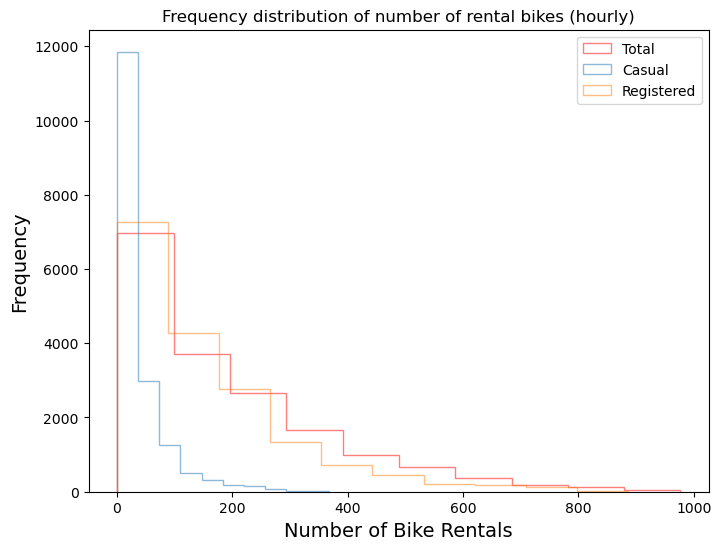

In [5]:
#Draw a histogram of cnt values
plt.figure(figsize=(8,6))
plt.hist(hour['cnt'],histtype='step', bins=10, alpha=0.5, label="Total",color = 'red')
plt.hist(hour['casual'],histtype='step', bins=10, alpha=0.5, label="Casual")
plt.hist(hour['registered'],histtype='step', bins=10, alpha=0.5, label="Registered")
plt.xlabel("Number of Bike Rentals", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Frequency distribution of number of rental bikes (hourly)")
plt.legend(loc='upper right');

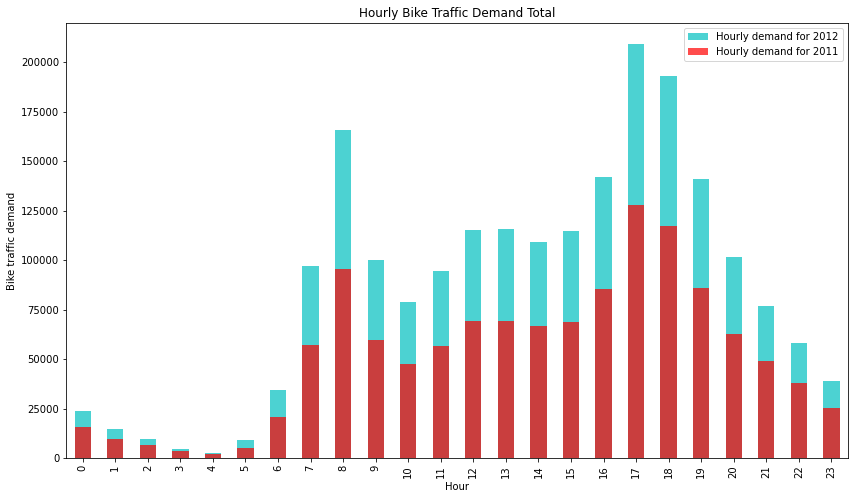

In [4]:
hour = pd.read_csv('hour.csv')
#Sort the dataset to get 2012 data
hour_2012 = hour[hour['dteday'] >= "2012-01-01"]
hour_2011 = hour[hour['dteday'] < "2012-01-01"]
#Plot hourly demand
hourly_demand_2011 = hour_2011.groupby('hr')['cnt'].sum()
hourly_demand_2012 = hour_2012.groupby('hr')['cnt'].sum()
hourly_demand_2012.plot(kind='bar',figsize=[14, 8],linewidth='4',alpha=0.7, color='c',label='Hourly demand for 2012');
hourly_demand_2011.plot(kind='bar',figsize=[14, 8],linewidth='4',alpha=0.7, color='r',label='Hourly demand for 2011');
plt.xlabel("Hour");
plt.ylabel("Bike traffic demand")
plt.title("Hourly Bike Traffic Demand Total");
plt.legend(loc='upper right');
plt.savefig('Hourly_bike_traffic.png',dpi = 300)


We have 6 cases:

1. Day, Casual
2. Day, Registered
3. Day, Total
4. Hour, Casual
5. Hour, Registered
6. Hour, Total


## CASE 1: Day, Casual

In [389]:
#OLS model
import statsmodels.api as sm
day = pd.read_csv('day.csv')
y = day['casual']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\User\AppData\Local\Temp\ipykernel_5276\2500364007.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     100.7
Date:                Thu, 08 Dec 2022   Prob (F-statistic):          1.06e-122
Time:                        00:45:23   Log-Likelihood:                -4028.3
No. Observations:                 548   AIC:                             8081.
Df Residuals:                     536   BIC:                             8132.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.0037    123.207      5.560      0.000     442.975     927.032
season        64.8876     28.069      2.312      0.021       9.749     120.026
yr           284.5879     32.918      8.645      0.000     219.924     349.252
mnth         -14.3138      8.697     -1.646      0.100     -31.399       2.771
holiday     -158.1235    103.800     -1.523      0.128    -362.029      45.782
weekday       18.9451      8.217      2.306      0.022       2.804      35.087
workingday  -771.8370     36.416    -21.195      0.000    -843.372    -700.302
weathersit  -119.8377     39.359     -3.045      0.002    -197.154     -42.521
temp        1649.2947    638.273      2.584      0.010     395.472    2903.118
atemp        331.1259    721.660      0.459      0.647   -1086.502    1748.754
hum         -345.7513    154.391     -2.239      0.026    -649.037     -42.465
windspeed   -964.3685    229.936     -4.194      0.000   -1416.055    -512.682
==============================================================================
Omnibus:                       76.800   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.223
Skew:                           0.729   Prob(JB):                     1.34e-41
Kurtosis:                       5.473   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\AppData\Local\Temp\ipykernel_5276\2176179256.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


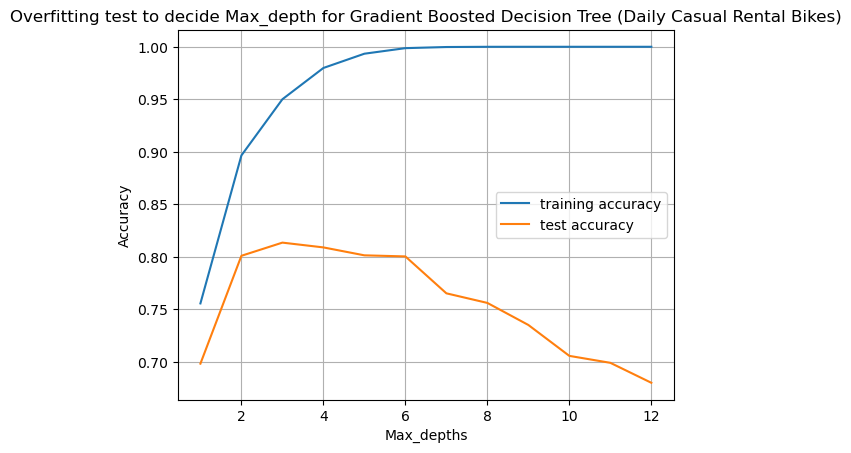

In [390]:
# Determine max_depth for Gradient Boosted Decision Regressor

day = pd.read_csv('day.csv')
y = np.array(day.casual)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth for GradientBoosting
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 3 for GBR

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1386181653.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


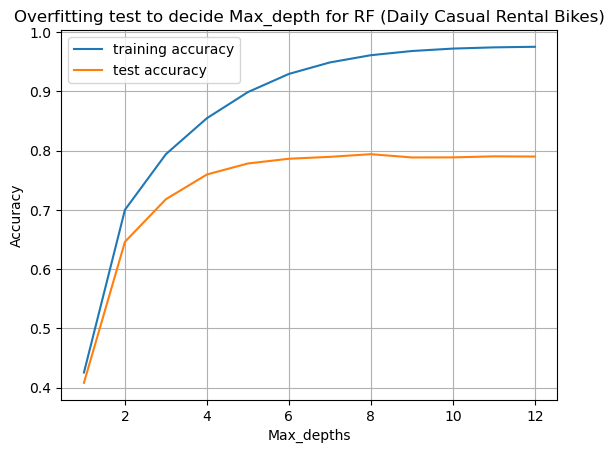

In [391]:
# Determine max_depth for Random Forest Regressor

day = pd.read_csv('day.csv')
y = np.array(day.casual)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 8 for RF

In [392]:
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

day = pd.read_csv('day.csv')
y = np.array(day.casual)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

# Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
R2_LR= r2_score(y_test,y_pred)
Train_acc_LR = reg.score(X_train, y_train)
Test_acc_LR = reg.score(X_test, y_test)
y_pred_LR = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))  # Note: Testing accuracy is also the R2 score

# Ridge Regression
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE_Ridge =np.sqrt(mean_squared_error(y_test,y_pred))
R2_Ridge= r2_score(y_test,y_pred)
Train_acc_Ridge = clf.score(X_train, y_train)
Test_acc_Ridge = clf.score(X_test, y_test)
y_pred_Ridge = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))

# Lasso Regression
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
RMSE_Lasso=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Lasso=r2_score(y_test,y_pred)
Train_acc_Lasso = cld.score(X_train, y_train)
Test_acc_Lasso = cld.score(X_test, y_test)
y_pred_Lasso = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))

# ElasticNet Regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE_Elastic=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Elastic=r2_score(y_test,y_pred)
Train_acc_Elastic = regr.score(X_train, y_train)
Test_acc_Elastic = regr.score(X_test, y_test)
y_pred_Elastic = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))

#GB regressor with max_depth = 3
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\2426823831.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


RMSE_LR= 390.4285549224291
R2_LR= 0.668928971695433
RMSE_Ridge= 393.9260344612883
R2_Ridge= 0.6629709009515264
RMSE_Lasso= 390.68808521281125
R2_Lasso= 0.66848867850021
RMSE_Elastic= 592.2165018488497
R2_Elastic= 0.23827354263055944
RMSE_GBR= 292.99416824503123
R2_GBR= 0.8135527493714519
RMSE_RF= 308.01341070497534
R2_RF= 0.7939477872265936


In [393]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
Train_acc = [Train_acc_LR,Train_acc_Ridge,Train_acc_Lasso,Train_acc_Elastic,Train_acc_GBR,Train_acc_RF]
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
Metrics_df_case1 = pd.DataFrame(list(zip(Model, Train_acc,RMSE,R2)),
                          columns =['Model', 'Training accuracy','RMSE','R2'])
Metrics_df_case1
Metrics_df_case1['Training accuracy']=np.round(Metrics_df_case1['Training accuracy'],4)
Metrics_df_case1['RMSE']=np.round(Metrics_df_case1['RMSE'],2)
Metrics_df_case1['R2']=np.round(Metrics_df_case1['R2'],2)
Metrics_df_case1

,Model,Training accuracy,RMSE,R2
0,MLR,0.6911,390.43,0.67
1,Ridge,0.6902,393.93,0.66
2,Lasso,0.6910,390.69,0.67
3,Elastic,0.3183,592.22,0.24
4,GBR,0.9501,292.99,0.81
5,RF,0.9610,308.01,0.79


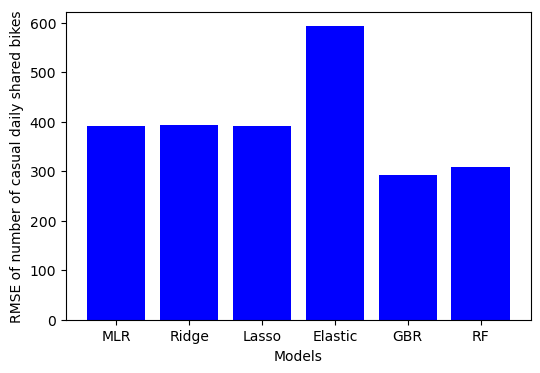

In [394]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of number of casual daily shared bikes")
plt.xlabel("Models");

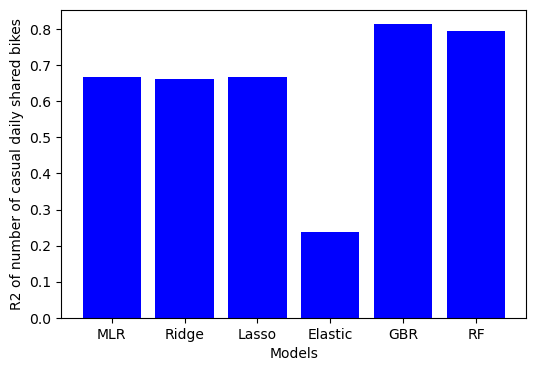

In [395]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,R2, color ='blue')
plt.ylabel("R2 of number of casual daily shared bikes")
plt.xlabel("Models");

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3169086328.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


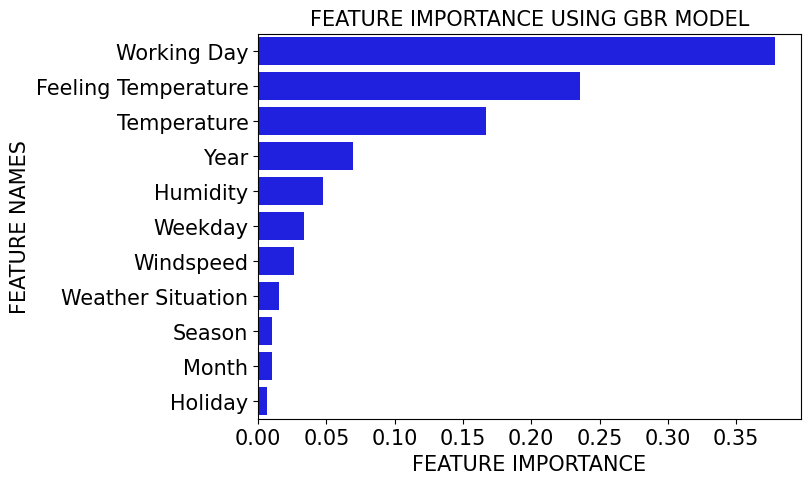

In [396]:
#Feature Importance using GBR Model (GBR with max_depth = 3)
day = pd.read_csv('day.csv')
y = np.array(day.casual)
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X=day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)

# plot the feature importances:

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(GBR.feature_importances_, X_cols_proper_name,'GBR') 

C:\Users\User\AppData\Local\Temp\ipykernel_5276\785481549.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


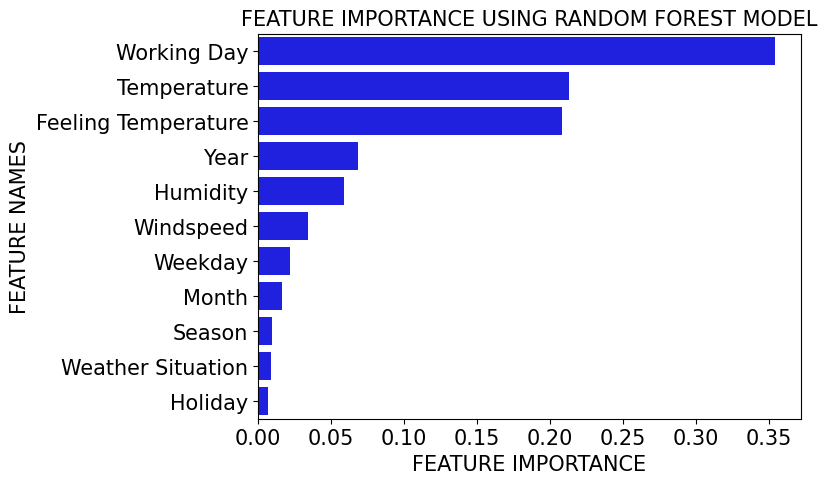

In [397]:
#Feature Importance using RF Model (RF with max_depth = 8)
day = pd.read_csv('day.csv')
y = np.array(day.casual)
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X=day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(forest.feature_importances_, X_cols_proper_name,'RANDOM FOREST') 

In [398]:
X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case1_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case1_GBR = df_feat_imp_case1_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C1_GBR'})
#df_feat_imp_case1_GBR
df_feat_imp_case1_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case1_RF = df_feat_imp_case1_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C1_RF'})
#df_feat_imp_case1_RF
df_feat_imp_case1_comb = pd.merge(df_feat_imp_case1_GBR,df_feat_imp_case1_RF,on = "Feature", how ='outer')
df_feat_imp_case1_comb = df_feat_imp_case1_comb.fillna(0)
df_feat_imp_case1_comb

,Feature,Feature Importance_C1_GBR,Feature Importance_C1_RF
0,Season,0.010119,0.009291
1,Year,0.069810,0.068621
2,Month,0.009905,0.016366
3,Holiday,0.006553,0.006797
4,Weekday,0.033488,0.022088
5,Working Day,0.378390,0.353983
6,Weather Situation,0.015626,0.008941
7,Temperature,0.166918,0.213097
8,Feeling Temperature,0.235361,0.207911
9,Humidity,0.047834,0.058882


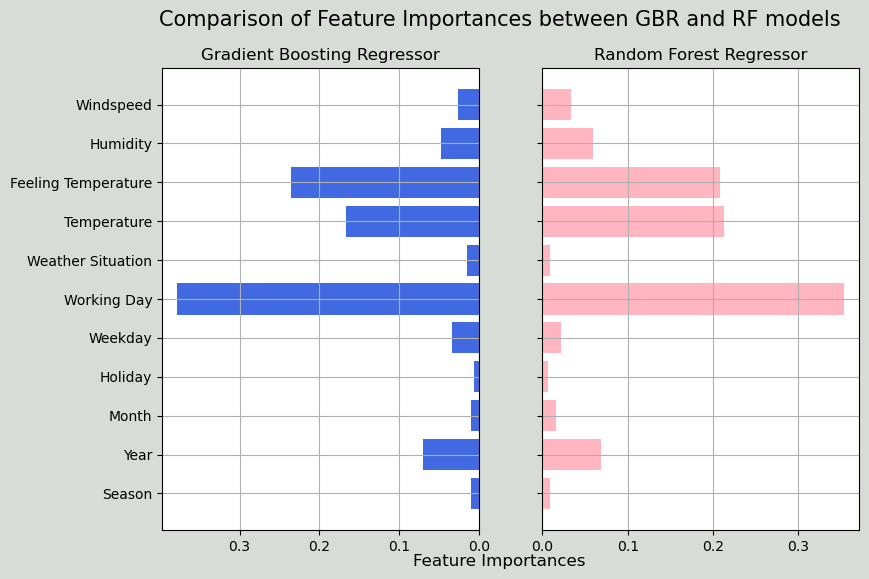

In [399]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case1_comb))
x_male = df_feat_imp_case1_comb['Feature Importance_C1_GBR']
x_female = df_feat_imp_case1_comb['Feature Importance_C1_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case1_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

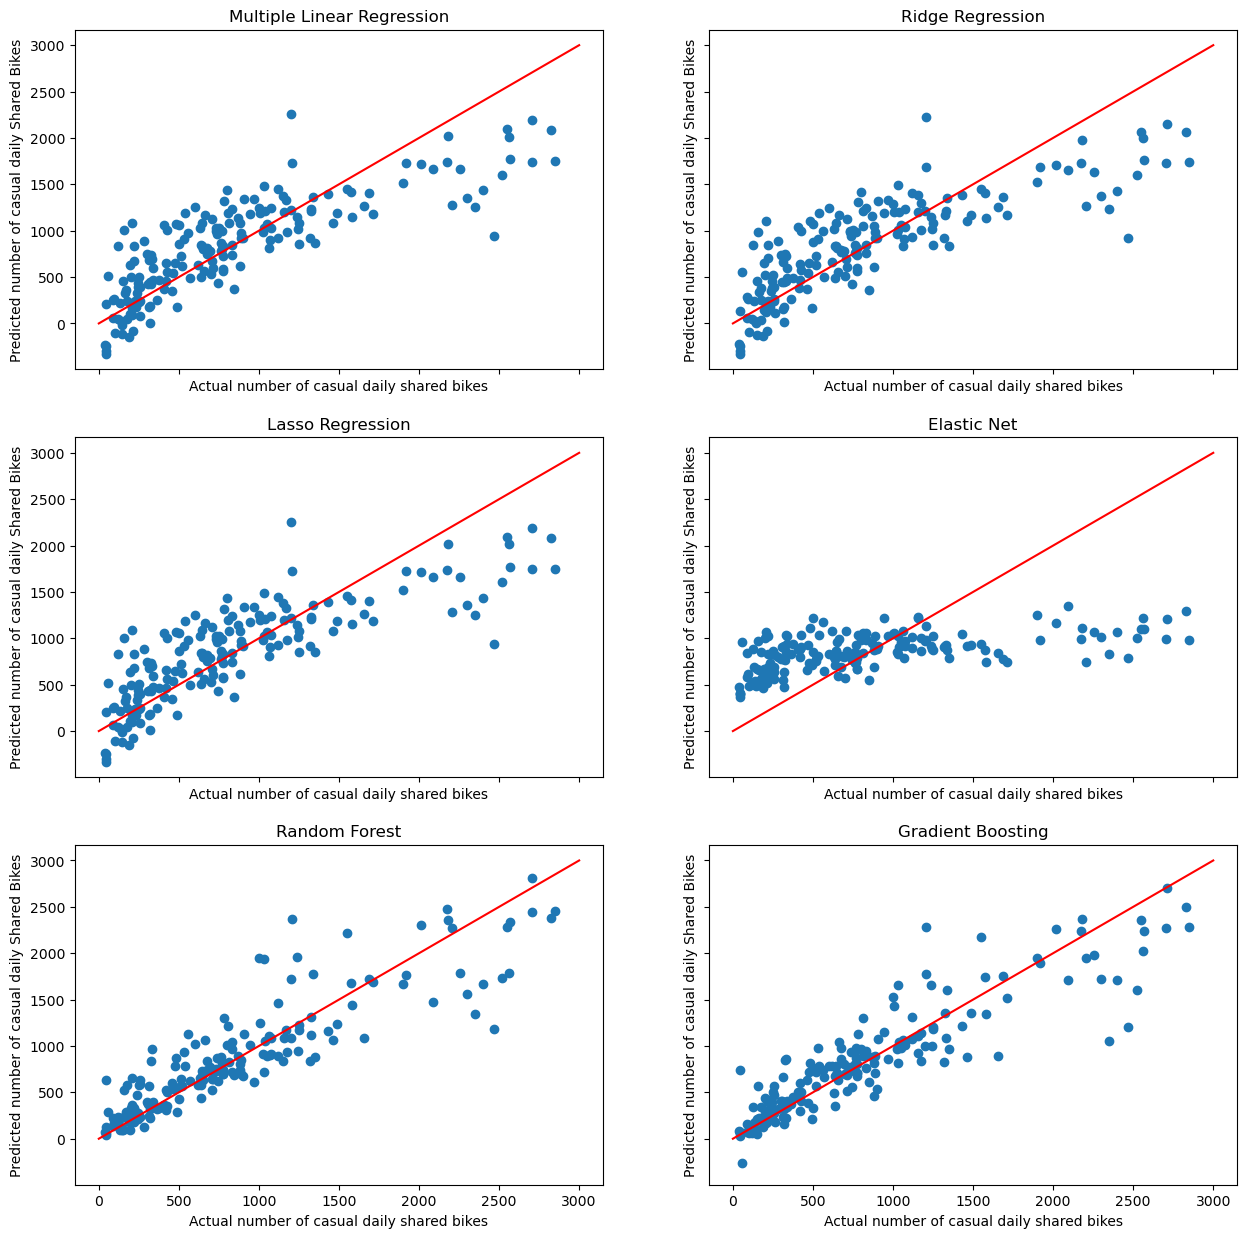

In [400]:
# Predicted vs Observed Plot

fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_LR)
x_45 = [0,3000]
y_45 = [0,3000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_Ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_Lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_Elastic)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBR)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of casual daily shared bikes', ylabel='Predicted number of casual daily Shared Bikes')

## CASE 2: Day, Registered

In [283]:
#OLS model
import statsmodels.api as sm
day = pd.read_csv('day.csv')
y = day['registered']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\User\AppData\Local\Temp\ipykernel_5276\778015092.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.9
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          7.85e-189
Time:                        22:30:05   Log-Likelihood:                -4345.2
No. Observations:                 548   AIC:                             8714.
Df Residuals:                     536   BIC:                             8766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        837.4751    219.671      3.812      0.000     405.953    1268.997
season       487.0747     50.045      9.733      0.000     388.767     585.383
yr          1749.9004     58.691     29.816      0.000    1634.609    1865.192
mnth         -30.8184     15.507     -1.987      0.047     -61.280      -0.357
holiday     -214.1267    185.070     -1.157      0.248    -577.678     149.424
weekday       41.5165     14.650      2.834      0.005      12.737      70.296
workingday   978.5515     64.927     15.072      0.000     851.009    1106.094
weathersit  -497.5829     70.174     -7.091      0.000    -635.433    -359.732
temp        1473.5737   1138.001      1.295      0.196    -761.916    3709.063
atemp       1774.0512   1286.675      1.379      0.169    -753.492    4301.595
hum         -569.9873    275.270     -2.071      0.039   -1110.728     -29.247
windspeed  -2096.0710    409.962     -5.113      0.000   -2901.400   -1290.742
==============================================================================
Omnibus:                      143.727   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              502.127
Skew:                          -1.188   Prob(JB):                    9.21e-110
Kurtosis:                       7.043   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3667299027.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


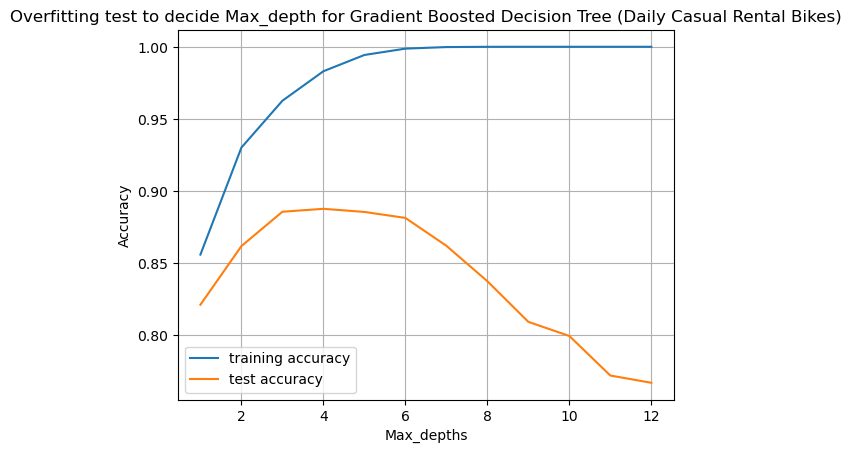

In [284]:
# Determine max_depth for Gradient Boosted Decision Regressor

day = pd.read_csv('day.csv')
y = np.array(day.registered)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth for GradientBoosting
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 3 for GBR

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3845322127.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


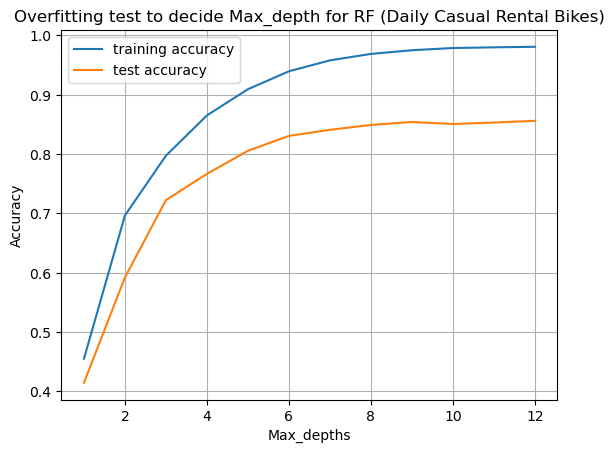

In [285]:
# Determine max_depth for Random Forest Regressor

day = pd.read_csv('day.csv')
y = np.array(day.registered)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 8 for RF

In [286]:
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

day = pd.read_csv('day.csv')
y = np.array(day.registered)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

# Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
R2_LR= r2_score(y_test,y_pred)
Train_acc_LR = reg.score(X_train, y_train)
Test_acc_LR = reg.score(X_test, y_test)
y_pred_LR = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))  # Note: Testing accuracy is also the R2 score

# Ridge Regression
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE_Ridge =np.sqrt(mean_squared_error(y_test,y_pred))
R2_Ridge= r2_score(y_test,y_pred)
Train_acc_Ridge = clf.score(X_train, y_train)
Test_acc_Ridge = clf.score(X_test, y_test)
y_pred_Ridge = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))

# Lasso Regression
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
RMSE_Lasso=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Lasso=r2_score(y_test,y_pred)
Train_acc_Lasso = cld.score(X_train, y_train)
Test_acc_Lasso = cld.score(X_test, y_test)
y_pred_Lasso = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))

# ElasticNet Regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE_Elastic=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Elastic=r2_score(y_test,y_pred)
Train_acc_Elastic = regr.score(X_train, y_train)
Test_acc_Elastic = regr.score(X_test, y_test)
y_pred_Elastic = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))

#GB regressor with max_depth = 3
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\2346461908.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


RMSE_LR= 652.9415461560235
R2_LR= 0.8222999963874957
RMSE_Ridge= 653.8972844308819
R2_Ridge= 0.8217794015715467
RMSE_Lasso= 652.992523253247
R2_Lasso= 0.8222722481639947
RMSE_Elastic= 1141.5984192131623
R2_Elastic= 0.45679276274204306
RMSE_GBR= 523.9343404991637
R2_GBR= 0.8855824723664475
RMSE_RF= 601.6196300576443
R2_RF= 0.8491369698087055


In [288]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
Train_acc = [Train_acc_LR,Train_acc_Ridge,Train_acc_Lasso,Train_acc_Elastic,Train_acc_GBR,Train_acc_RF]
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
Metrics_df_case2 = pd.DataFrame(list(zip(Model, Train_acc,RMSE,R2)),
                          columns =['Model', 'Training accuracy','RMSE','R2'])
Metrics_df_case2
Metrics_df_case2['Training accuracy']=np.round(Metrics_df_case2['Training accuracy'],4)
Metrics_df_case2['RMSE']=np.round(Metrics_df_case2['RMSE'],2)
Metrics_df_case2['R2']=np.round(Metrics_df_case2['R2'],2)
Metrics_df_case2

,Model,Training accuracy,RMSE,R2
0,MLR,0.8133,652.94,0.82
1,Ridge,0.8125,653.90,0.82
2,Lasso,0.8133,652.99,0.82
3,Elastic,0.4700,1141.60,0.46
4,GBR,0.9626,523.93,0.89
5,RF,0.9689,601.62,0.85


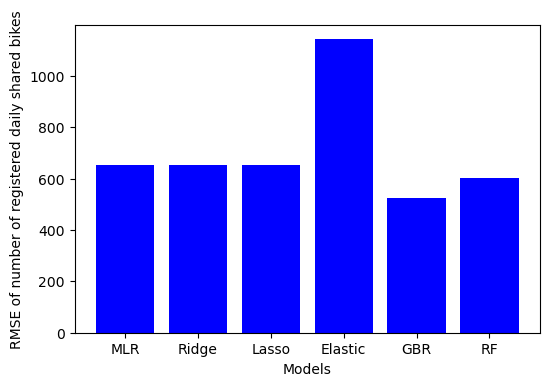

In [289]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of number of registered daily shared bikes")
plt.xlabel("Models");

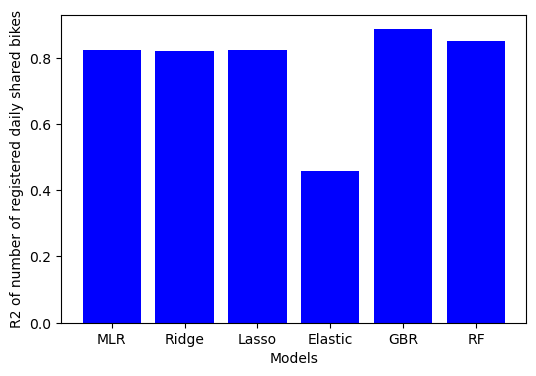

In [290]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,R2, color ='blue')
plt.ylabel("R2 of number of registered daily shared bikes")
plt.xlabel("Models");

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3310068245.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


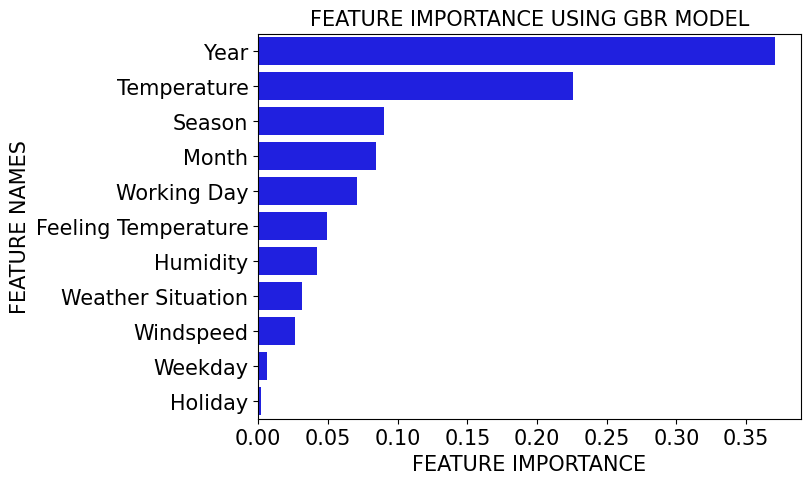

In [291]:
#Feature Importance using GBR Model (GBR with max_depth = 3)
day = pd.read_csv('day.csv')
y = np.array(day.registered)
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X=day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)

# plot the feature importances:

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(GBR.feature_importances_, X_cols_proper_name,'GBR') 

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1001547972.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


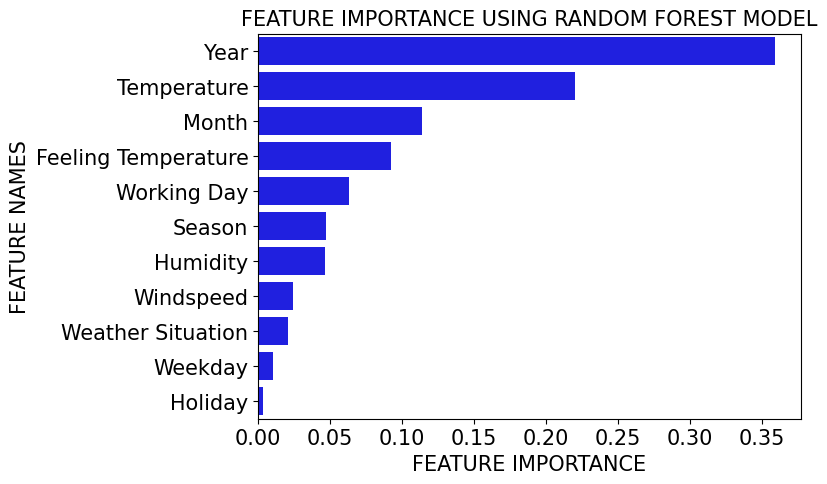

In [295]:
#Feature Importance using RF Model (RF with max_depth = 8)
day = pd.read_csv('day.csv')
y = np.array(day.registered)
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X=day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(forest.feature_importances_, X_cols_proper_name,'RANDOM FOREST') 

In [297]:
X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case2_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case2_GBR = df_feat_imp_case2_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C2_GBR'})
#df_feat_imp_case2_GBR
df_feat_imp_case2_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case2_RF = df_feat_imp_case2_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C2_RF'})
#df_feat_imp_case2_RF
df_feat_imp_case2_comb = pd.merge(df_feat_imp_case2_GBR,df_feat_imp_case2_RF,on = "Feature", how ='outer')
df_feat_imp_case2_comb = df_feat_imp_case2_comb.fillna(0)
df_feat_imp_case2_comb

,Feature,Feature Importance_C2_GBR,Feature Importance_C2_RF
0,Season,0.090350,0.046957
1,Year,0.370507,0.358868
2,Month,0.084335,0.113528
3,Holiday,0.002262,0.003024
4,Weekday,0.006349,0.010178
5,Working Day,0.070923,0.063114
6,Weather Situation,0.031260,0.021006
7,Temperature,0.225886,0.220251
8,Feeling Temperature,0.049298,0.092216
9,Humidity,0.042203,0.046740


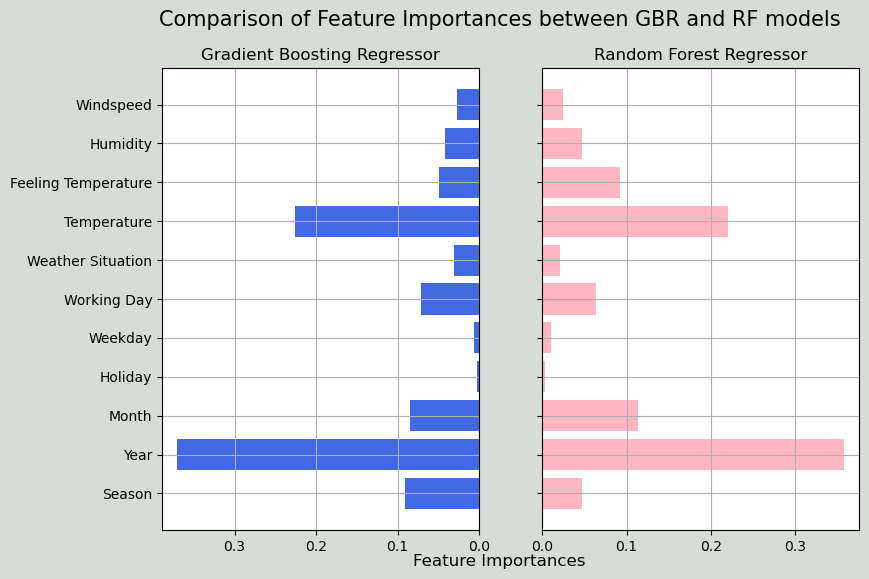

In [298]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case2_comb))
x_male = df_feat_imp_case2_comb['Feature Importance_C2_GBR']
x_female = df_feat_imp_case2_comb['Feature Importance_C2_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case1_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

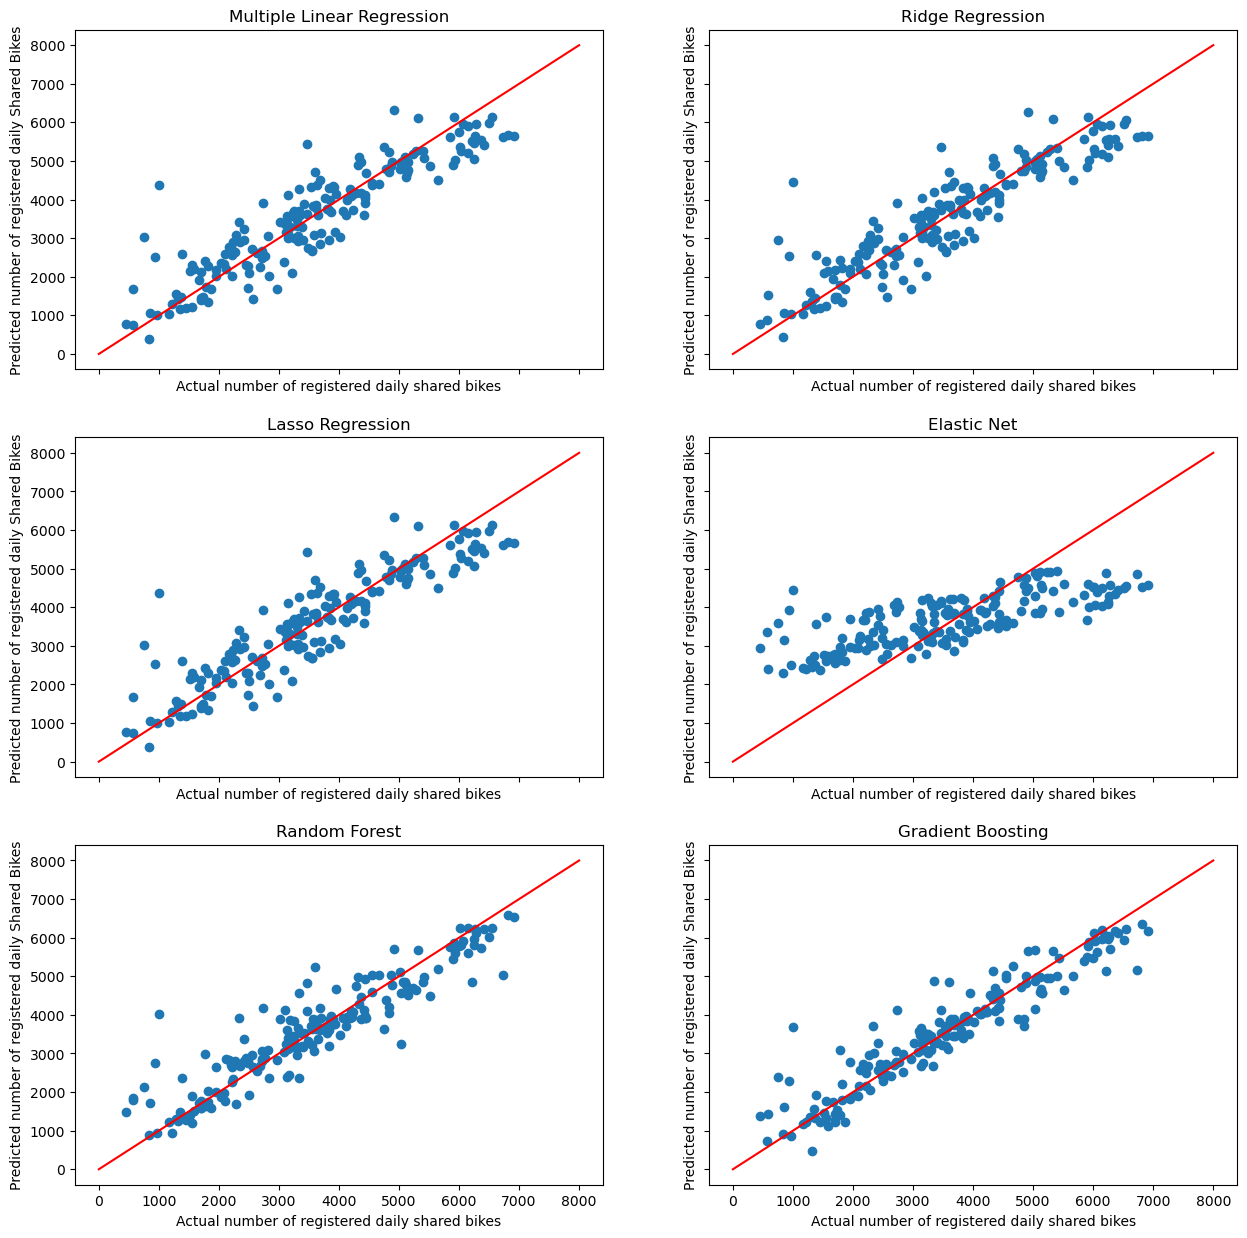

In [303]:
# Predicted vs Observed Plot

fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_LR)
x_45 = [0,8000]
y_45 = [0,8000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_Ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_Lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_Elastic)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBR)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of registered daily shared bikes', ylabel='Predicted number of registered daily Shared Bikes')

## CASE 3: Day, Total

In [271]:
#OLS model
import statsmodels.api as sm
day = pd.read_csv('day.csv')
y = day['cnt']
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1189428541.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          5.26e-179
Time:                        22:10:10   Log-Likelihood:                -4479.6
No. Observations:                 548   AIC:                             8983.
Df Residuals:                     536   BIC:                             9035.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1522.4788    280.735      5.423      0.000     971.004    2073.954
season       551.9622     63.956      8.630      0.000     426.327     677.598
yr          2034.4883     75.005     27.125      0.000    1887.148    2181.828
mnth         -45.1323     19.817     -2.277      0.023     -84.061      -6.204
holiday     -372.2502    236.515     -1.574      0.116    -836.860      92.360
weekday       60.4616     18.723      3.229      0.001      23.682      97.241
workingday   206.7145     82.975      2.491      0.013      43.718     369.711
weathersit  -617.4206     89.681     -6.885      0.000    -793.590    -441.251
temp        3122.8685   1454.339      2.147      0.032     265.965    5979.772
atemp       2105.1771   1644.340      1.280      0.201   -1124.965    5335.319
hum         -915.7387    351.789     -2.603      0.009   -1606.792    -224.685
windspeed  -3060.4395    523.922     -5.841      0.000   -4089.631   -2031.248
==============================================================================
Omnibus:                       77.287   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.464
Skew:                          -0.775   Prob(JB):                     4.32e-37
Kurtosis:                       5.220   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\AppData\Local\Temp\ipykernel_5276\2731299182.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


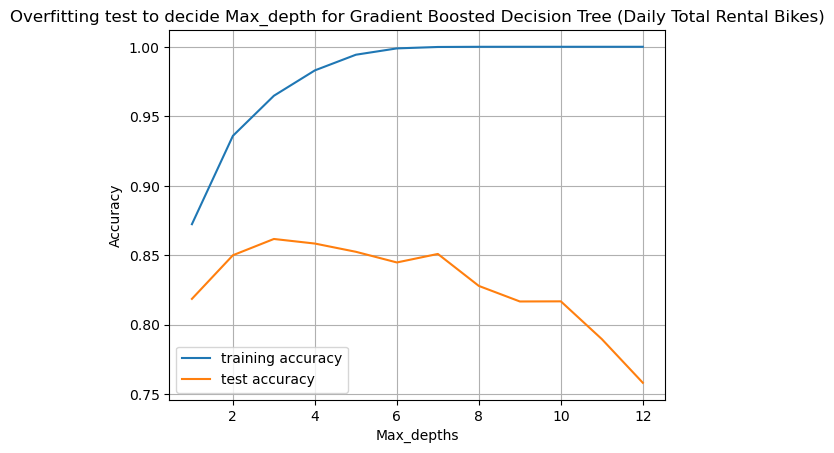

In [272]:
# Determine max_depth for Gradient Boosted Decision Regressor

day = pd.read_csv('day.csv')
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth for GradientBoosting
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Daily Total Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 3 for GBR

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1970215319.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


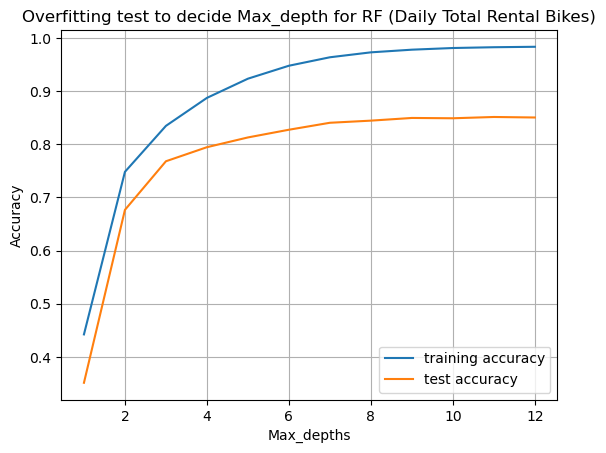

In [273]:
# Determine max_depth for Random Forest Regressor

day = pd.read_csv('day.csv')
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
#Define input variable
X=day.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Daily Total Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 8 for RF

In [274]:
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

day = pd.read_csv('day.csv')
y = np.array(day.cnt)
#Drop unnecessary variables
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X = day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

# Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
R2_LR= r2_score(y_test,y_pred)
Train_acc_LR = reg.score(X_train, y_train)
Test_acc_LR = reg.score(X_test, y_test)
y_pred_LR = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))  # Note: Testing accuracy is also the R2 score

# Ridge Regression
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE_Ridge =np.sqrt(mean_squared_error(y_test,y_pred))
R2_Ridge= r2_score(y_test,y_pred)
Train_acc_Ridge = clf.score(X_train, y_train)
Test_acc_Ridge = clf.score(X_test, y_test)
y_pred_Ridge = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))

# Lasso Regression
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
RMSE_Lasso=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Lasso=r2_score(y_test,y_pred)
Train_acc_Lasso = cld.score(X_train, y_train)
Test_acc_Lasso = cld.score(X_test, y_test)
y_pred_Lasso = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))

# ElasticNet Regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE_Elastic=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Elastic=r2_score(y_test,y_pred)
Train_acc_Elastic = regr.score(X_train, y_train)
Test_acc_Elastic = regr.score(X_test, y_test)
y_pred_Elastic = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))

#GB regressor with max_depth = 3
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))


C:\Users\User\AppData\Local\Temp\ipykernel_5276\1210512607.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


RMSE_LR= 881.0898652570456
R2_LR= 0.790462488187492
RMSE_Ridge= 887.4951971339271
R2_Ridge= 0.7874048298193317
RMSE_Lasso= 881.2426596108112
R2_Lasso= 0.7903898079172662
RMSE_Elastic= 1499.0930060490434
R2_Elastic= 0.3934333521572039
RMSE_GBR= 715.9990847028512
R2_GBR= 0.8616286095112616
RMSE_RF= 758.8033583663545
R2_RF= 0.8445896782346678


In [275]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
Train_acc = [Train_acc_LR,Train_acc_Ridge,Train_acc_Lasso,Train_acc_Elastic,Train_acc_GBR,Train_acc_RF]
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
Metrics_df_case3 = pd.DataFrame(list(zip(Model, Train_acc,RMSE,R2)),
                          columns =['Model', 'Training accuracy','RMSE','R2'])
Metrics_df_case3['Training accuracy']=np.round(Metrics_df_case1['Training accuracy'],4)
Metrics_df_case3['RMSE']=np.round(Metrics_df_case1['RMSE'],2)
Metrics_df_case3['R2']=np.round(Metrics_df_case1['R2'],2)
Metrics_df_case3

,Model,Training accuracy,RMSE,R2
0,MLR,0.6911,390.43,0.67
1,Ridge,0.6902,393.93,0.66
2,Lasso,0.6910,390.69,0.67
3,Elastic,0.3183,592.22,0.24
4,GBR,0.9501,292.99,0.81
5,RF,0.9610,308.01,0.79


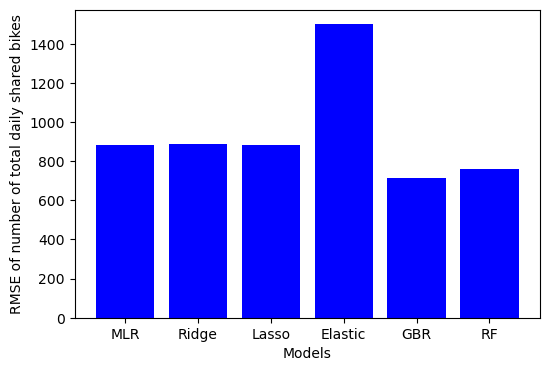

In [276]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of number of total daily shared bikes")
plt.xlabel("Models");

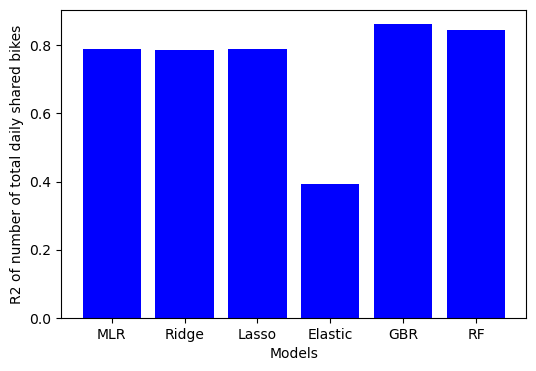

In [277]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,R2, color ='blue')
plt.ylabel("R2 of number of total daily shared bikes")
plt.xlabel("Models");

C:\Users\User\AppData\Local\Temp\ipykernel_5276\937542421.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


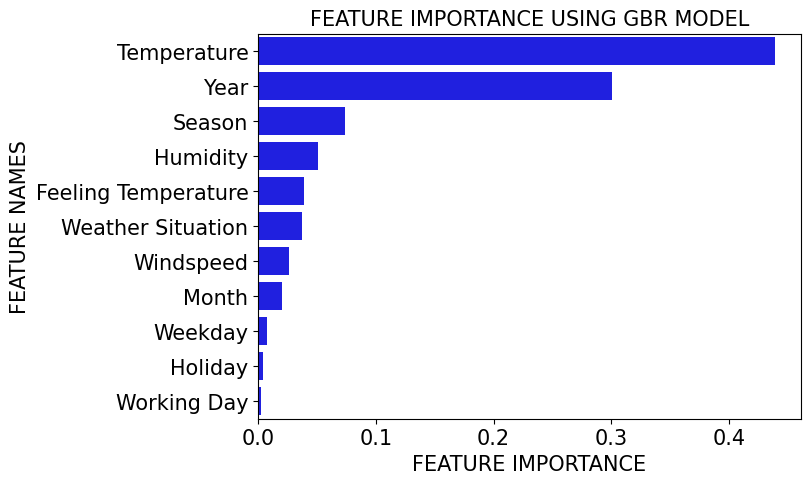

In [278]:
#Feature Importance using GBR Model (GBR with max_depth = 3)
day = pd.read_csv('day.csv')
y = np.array(day.cnt)
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X=day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

GBR = GradientBoostingRegressor(n_estimators=100,max_depth=3, random_state=6608)
GBR.fit(X_train, y_train)

# plot the feature importances:

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(GBR.feature_importances_, X_cols_proper_name,'GBR') 

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1220447526.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)


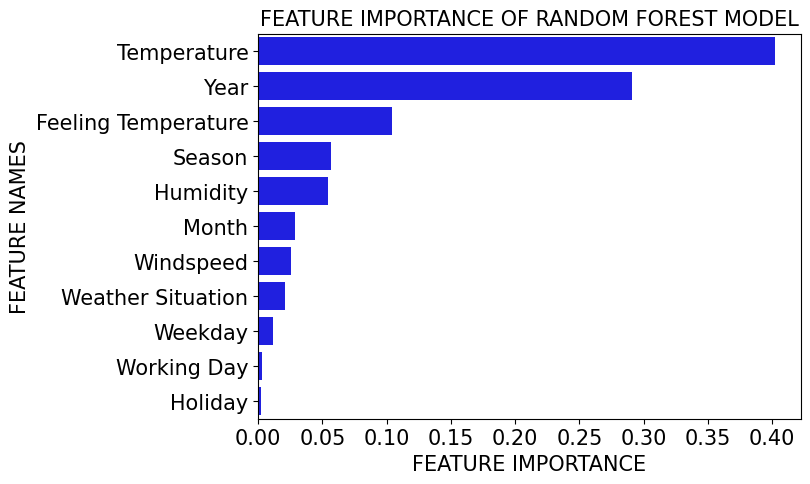

In [279]:
#Feature Importance using RF Model (RF with max_depth = 8)
day = pd.read_csv('day.csv')
y = np.array(day.cnt)
day.drop(['cnt','dteday','instant','registered','casual'],1,inplace=True)
X=day.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(forest.feature_importances_, X_cols_proper_name,'RANDOM FOREST') 

In [280]:
X_cols_proper_name = ['Season','Year','Month','Holiday','Weekday','Working Day','Weather Situation',
                      'Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case3_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case3_GBR = df_feat_imp_case3_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C3_GBR'})
#df_feat_imp_case3_GBR
df_feat_imp_case3_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case3_RF = df_feat_imp_case3_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C3_RF'})
#df_feat_imp_case3_RF
df_feat_imp_case3_comb = pd.merge(df_feat_imp_case3_GBR,df_feat_imp_case3_RF,on = "Feature", how ='outer')
df_feat_imp_case3_comb = df_feat_imp_case3_comb.fillna(0)
df_feat_imp_case3_comb

,Feature,Feature Importance_C3_GBR,Feature Importance_C3_RF
0,Season,0.073727,0.056775
1,Year,0.300922,0.290957
2,Month,0.020008,0.028455
3,Holiday,0.003883,0.001918
4,Weekday,0.007815,0.011852
5,Working Day,0.002221,0.002942
6,Weather Situation,0.036968,0.020913
7,Temperature,0.438839,0.402159
8,Feeling Temperature,0.038534,0.104104
9,Humidity,0.050833,0.054246


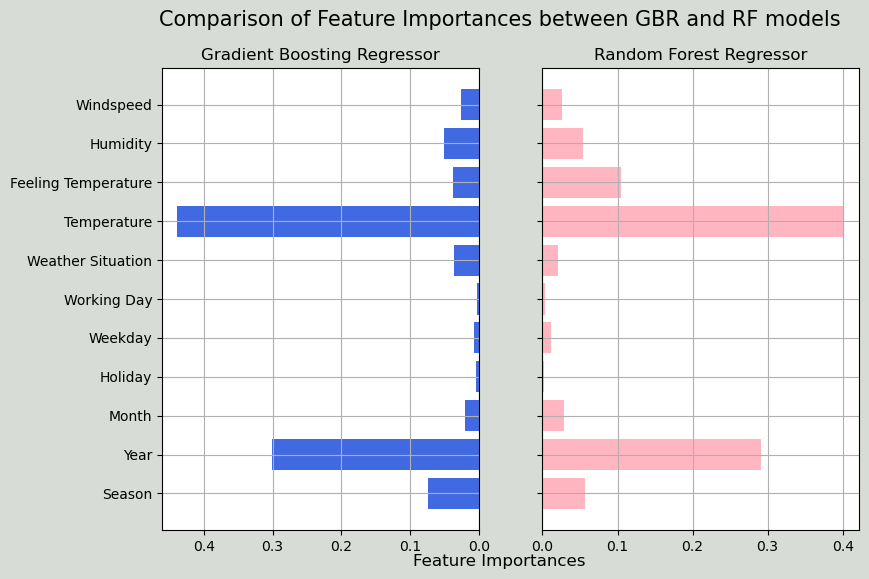

In [281]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case3_comb))
x_male = df_feat_imp_case3_comb['Feature Importance_C3_GBR']
x_female = df_feat_imp_case3_comb['Feature Importance_C3_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case3_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

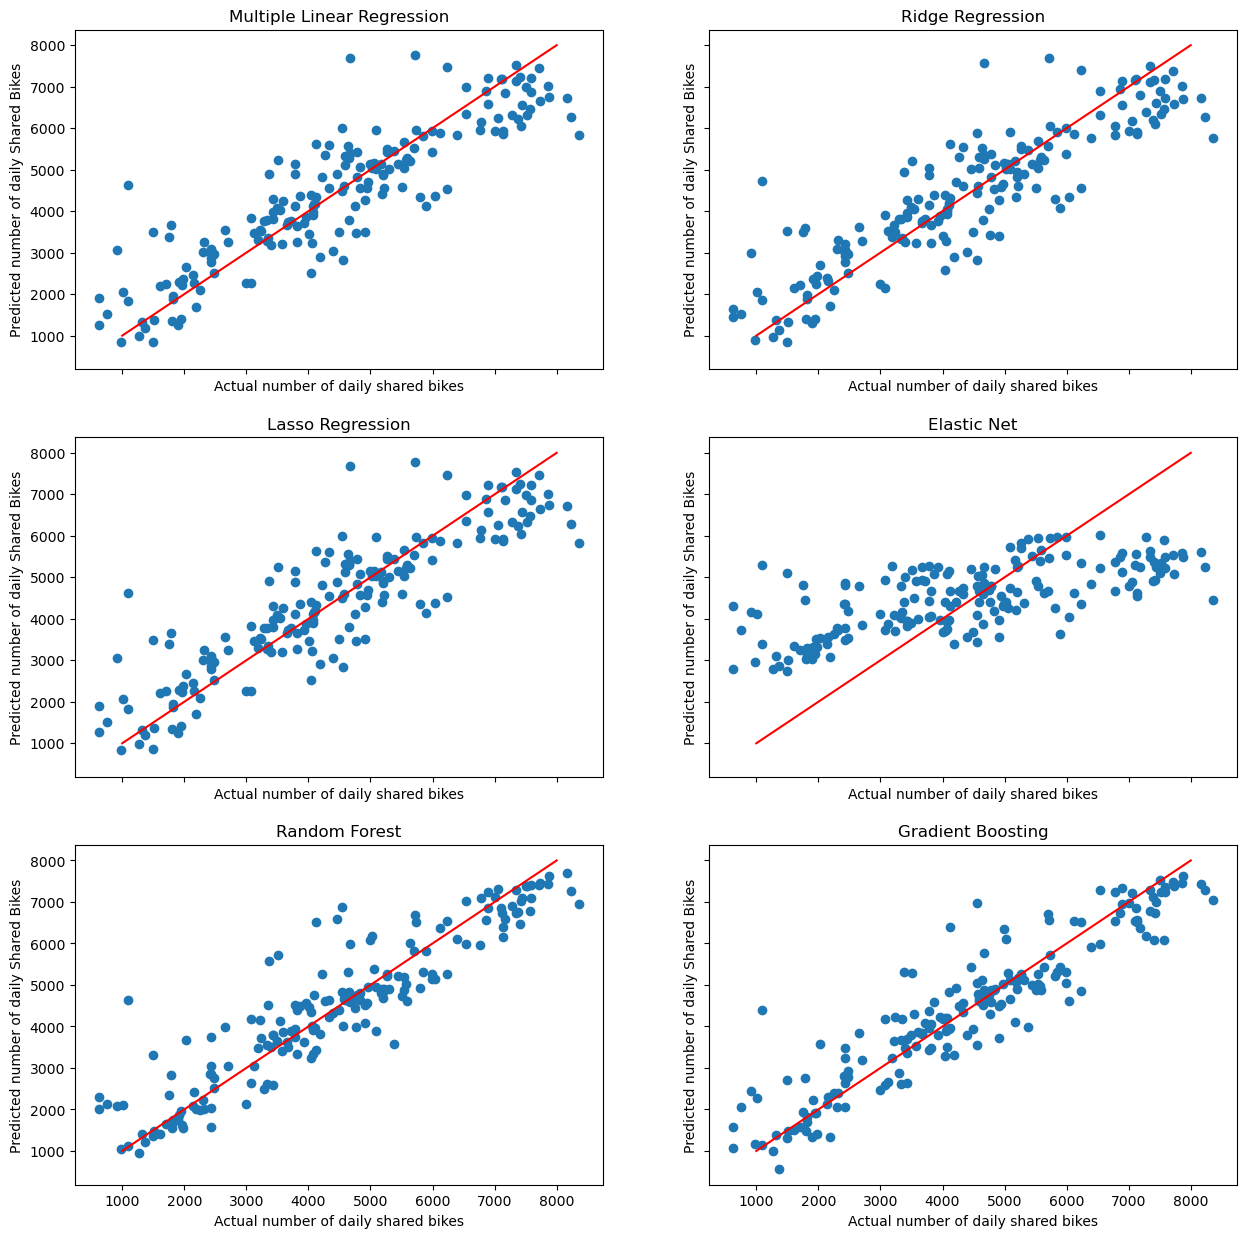

In [282]:
# Predicted vs Observed Plot

fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_LR)
x_45 = [1000,8000]
y_45 = [1000,8000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_Ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_Lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_Elastic)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBR)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of daily shared bikes', ylabel='Predicted number of daily Shared Bikes')

## CASE 4: Hour, Casual

In [5]:
#OLS model
import statsmodels.api as sm
hour = pd.read_csv('hour.csv')
y = hour['casual']
X = hour.drop(['instant','dteday','registered','casual','cnt'],1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_73624/610455230.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = hour.drop(['instant','dteday','registered','casual','cnt'],1)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     906.8
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:23:51   Log-Likelihood:                -65343.
No. Observations:               13034   AIC:                         1.307e+05
Df Residuals:                   13021   BIC:                         1.308e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.5002      2.097      9.298      0.000      15.389      23.611
season         1.8500      0.536      3.453      0.001       0.800       2.900
yr            10.4454      0.642     16.270      0.000       9.187      11.704
mnth          -0.0903      0.167     -0.540      0.589      -0.418       0.237
hr             1.2144      0.049     24.840      0.000       1.119       1.310
holiday      -11.8668      1.988     -5.970      0.000     -15.763      -7.971
weekday        0.8806      0.160      5.491      0.000       0.566       1.195
workingday   -35.4666      0.709    -50.019      0.000     -36.856     -34.077
weathersit     2.0983      0.566      3.709      0.000       0.989       3.207
temp          53.7942     11.025      4.879      0.000      32.184      75.405
atemp         60.7868     12.383      4.909      0.000      36.515      85.059
hum          -70.8467      2.052    -34.526      0.000     -74.869     -66.825
windspeed      2.4659      2.866      0.860      0.390      -3.152       8.084
==============================================================================
Omnibus:                     5502.817   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36069.799
Skew:                           1.907   Prob(JB):                         0.00
Kurtosis:                      10.202   Cond. No.                         794.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\AppData\Local\Temp\ipykernel_5276\4133550869.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


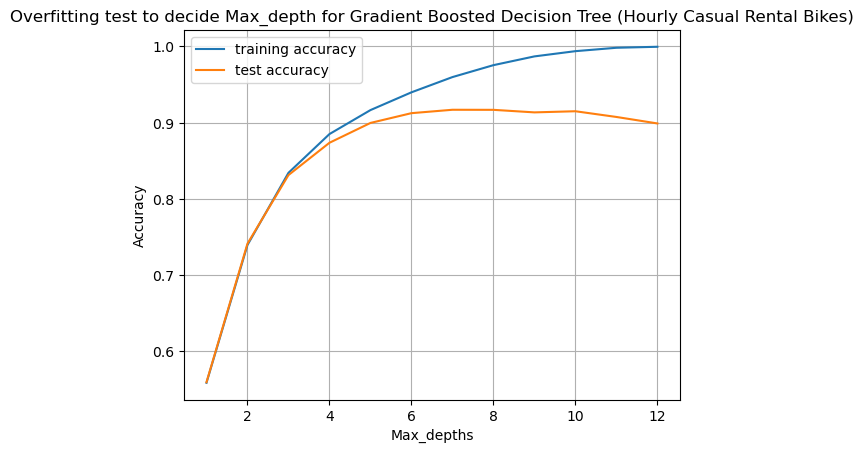

In [344]:
# Determine max_depth for Gradient Boosted Decision Regressor

hour = pd.read_csv('hour.csv')
y = np.array(hour.casual)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth for GradientBoosting
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Hourly Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 8 for GBR

C:\Users\User\AppData\Local\Temp\ipykernel_5276\722670638.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


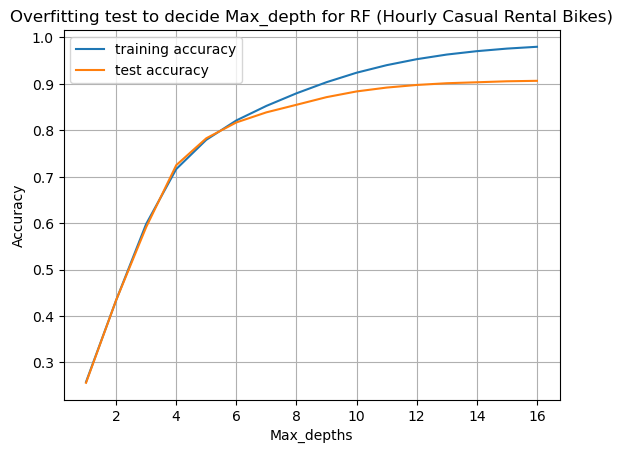

In [345]:
# Determine max_depth for Random Forest Regressor

hour = pd.read_csv('hour.csv')
y = np.array(hour.casual)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 16
depth_settings = range(1, 17)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Hourly Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 12 for RF

In [321]:
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

hour = pd.read_csv('hour.csv')
y = np.array(hour.casual)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

# Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
R2_LR= r2_score(y_test,y_pred)
Train_acc_LR = reg.score(X_train, y_train)
Test_acc_LR = reg.score(X_test, y_test)
y_pred_LR = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))  # Note: Testing accuracy is also the R2 score

# Ridge Regression
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE_Ridge =np.sqrt(mean_squared_error(y_test,y_pred))
R2_Ridge= r2_score(y_test,y_pred)
Train_acc_Ridge = clf.score(X_train, y_train)
Test_acc_Ridge = clf.score(X_test, y_test)
y_pred_Ridge = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))

# Lasso Regression
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
RMSE_Lasso=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Lasso=r2_score(y_test,y_pred)
Train_acc_Lasso = cld.score(X_train, y_train)
Test_acc_Lasso = cld.score(X_test, y_test)
y_pred_Lasso = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))

# ElasticNet Regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE_Elastic=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Elastic=r2_score(y_test,y_pred)
Train_acc_Elastic = regr.score(X_train, y_train)
Test_acc_Elastic = regr.score(X_test, y_test)
y_pred_Elastic = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))

#GB regressor with max_depth = 8
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 12
forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3157972355.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


RMSE_LR= 36.072174888259745
R2_LR= 0.45732571930034516
RMSE_Ridge= 36.07344504291235
R2_Ridge= 0.4572875018987107
RMSE_Lasso= 36.122995086950205
R2_Lasso= 0.45579555140617267
RMSE_Elastic= 43.773128933007904
R2_Elastic= 0.20088411035518816
RMSE_GBR= 14.117695585137131
R2_GBR= 0.9168768084578999
RMSE_RF= 15.677642172366907
R2_RF= 0.8974923967737918


In [333]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
Train_acc = [Train_acc_LR,Train_acc_Ridge,Train_acc_Lasso,Train_acc_Elastic,Train_acc_GBR,Train_acc_RF]
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
Metrics_df_case4 = pd.DataFrame(list(zip(Model, Train_acc,RMSE,R2)),
                          columns =['Model', 'Training accuracy','RMSE','R2'])
Metrics_df_case4
Metrics_df_case4['Training accuracy']=np.round(Metrics_df_case4['Training accuracy'],4)
Metrics_df_case4['RMSE']=np.round(Metrics_df_case4['RMSE'],2)
Metrics_df_case4['R2']=np.round(Metrics_df_case4['R2'],2)
Metrics_df_case4

,Model,Training accuracy,RMSE,R2
0,MLR,0.4551,36.07,0.46
1,Ridge,0.4551,36.07,0.46
2,Lasso,0.4545,36.12,0.46
3,Elastic,0.2088,43.77,0.20
4,GBR,0.9755,14.12,0.92
5,RF,0.9530,15.68,0.90


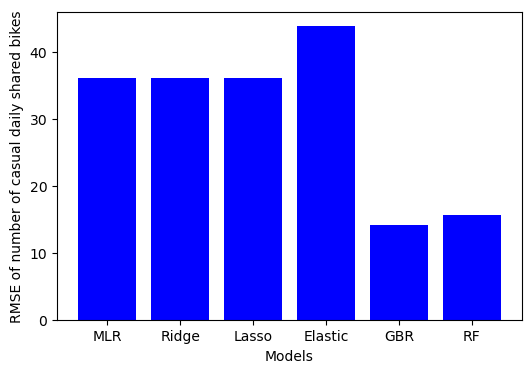

In [323]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of number of casual daily shared bikes")
plt.xlabel("Models");

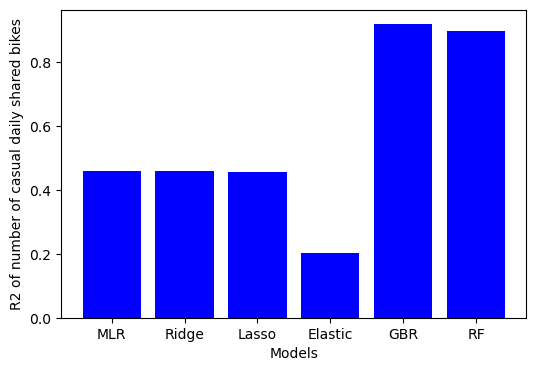

In [324]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,R2, color ='blue')
plt.ylabel("R2 of number of casual daily shared bikes")
plt.xlabel("Models");

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3729225034.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


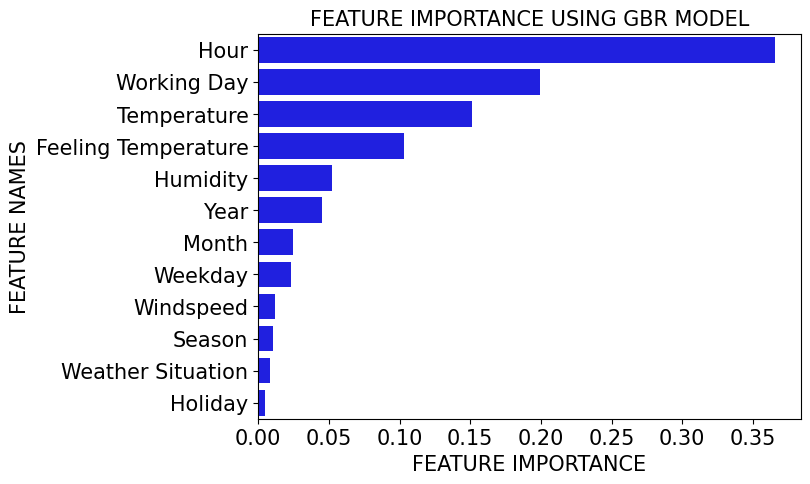

In [329]:
#Feature Importance using GBR Model (GBR with max_depth = 8)
hour = pd.read_csv('hour.csv')
y = np.array(hour.casual)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)

# plot the feature importances:

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(GBR.feature_importances_, X_cols_proper_name,'GBR') 

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1041901706.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


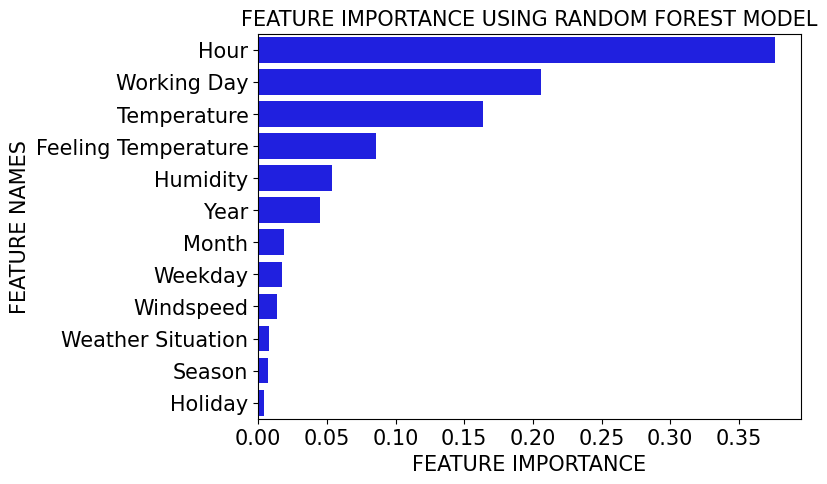

In [331]:
#Feature Importance using RF Model (RF with max_depth = 12)
hour = pd.read_csv('hour.csv')
y = np.array(hour.casual)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(forest.feature_importances_, X_cols_proper_name,'RANDOM FOREST')

In [335]:
X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case4_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case4_GBR = df_feat_imp_case4_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C4_GBR'})
#df_feat_imp_case4_GBR
df_feat_imp_case4_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case4_RF = df_feat_imp_case4_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C4_RF'})
#df_feat_imp_case4_RF
df_feat_imp_case4_comb = pd.merge(df_feat_imp_case4_GBR,df_feat_imp_case4_RF,on = "Feature", how ='outer')
df_feat_imp_case4_comb = df_feat_imp_case4_comb.fillna(0)
df_feat_imp_case4_comb

,Feature,Feature Importance_C4_GBR,Feature Importance_C4_RF
0,Season,0.010281,0.007528
1,Year,0.044886,0.045094
2,Month,0.024590,0.018857
3,Hour,0.365506,0.376118
4,Holiday,0.004697,0.004516
5,Weekday,0.023500,0.017714
6,Working Day,0.199433,0.205702
7,Weather Situation,0.008657,0.007701
8,Temperature,0.151516,0.163844
9,Feeling Temperature,0.103033,0.085934


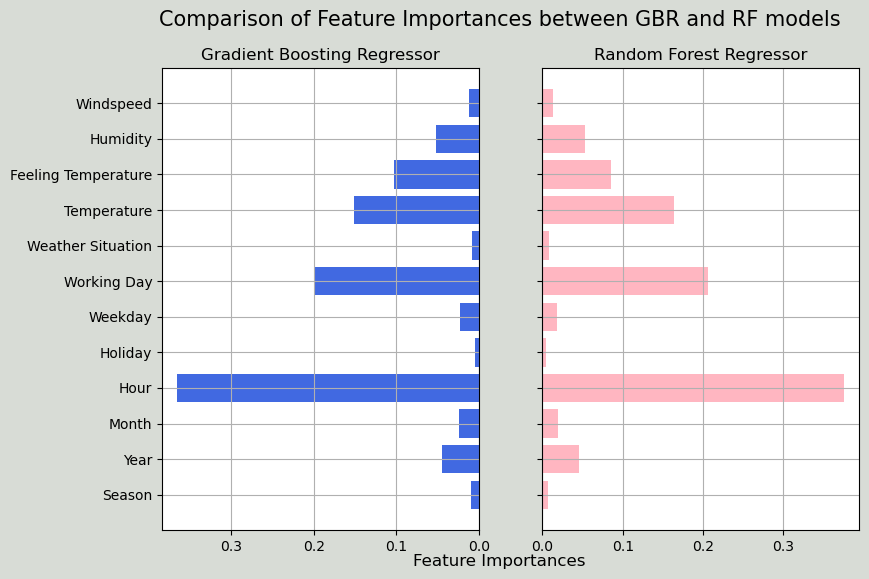

In [337]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case4_comb))
x_male = df_feat_imp_case4_comb['Feature Importance_C4_GBR']
x_female = df_feat_imp_case4_comb['Feature Importance_C4_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case4_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

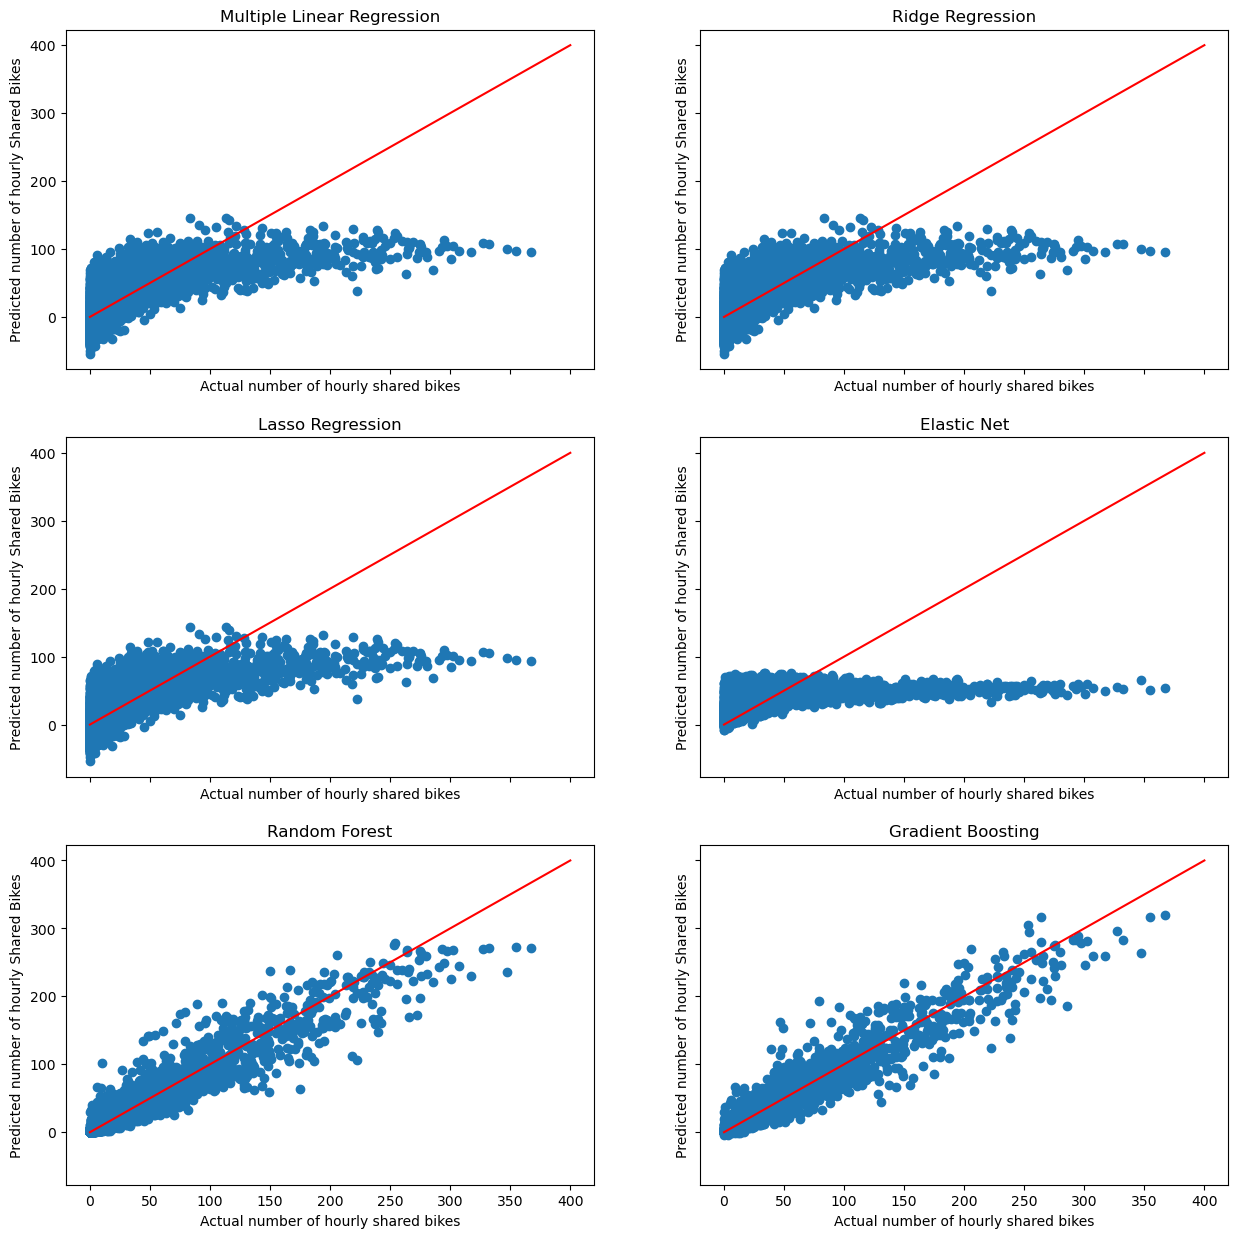

In [340]:
# Predicted vs Observed Plot

fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_LR)
x_45 = [0,400]
y_45 = [0,400]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_Ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_Lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_Elastic)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBR)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of hourly shared bikes', ylabel='Predicted number of hourly Shared Bikes')

## CASE 5: Hour, Registered

In [6]:
#OLS model
import statsmodels.api as sm
hour = pd.read_csv('hour.csv')
y = hour['registered']
X = hour.drop(['instant','dteday','registered','casual','cnt'],1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_73624/1983113355.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = hour.drop(['instant','dteday','registered','casual','cnt'],1)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     539.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:31:41   Log-Likelihood:                -81219.
No. Observations:               13034   AIC:                         1.625e+05
Df Residuals:                   13021   BIC:                         1.626e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.1498      7.089     -5.804      0.000     -55.046     -27.253
season        19.1586      1.811     10.579      0.000      15.609      22.708
yr            69.2937      2.170     31.928      0.000      65.040      73.548
mnth          -0.2735      0.565     -0.484      0.628      -1.382       0.835
hr             6.3918      0.165     38.677      0.000       6.068       6.716
holiday      -12.8932      6.719     -1.919      0.055     -26.064       0.278
weekday        1.0330      0.542      1.905      0.057      -0.030       2.096
workingday    39.7132      2.397     16.568      0.000      35.015      44.412
weathersit    -6.9444      1.913     -3.631      0.000     -10.693      -3.195
temp           6.1861     37.270      0.166      0.868     -66.868      79.240
atemp        188.6281     41.860      4.506      0.000     106.577     270.679
hum         -128.1405      6.937    -18.473      0.000    -141.737    -114.544
windspeed     40.0249      9.689      4.131      0.000      21.034      59.016
==============================================================================
Omnibus:                     3768.016   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10608.495
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                       6.184   Cond. No.                         794.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\AppData\Local\Temp\ipykernel_5276\380504641.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


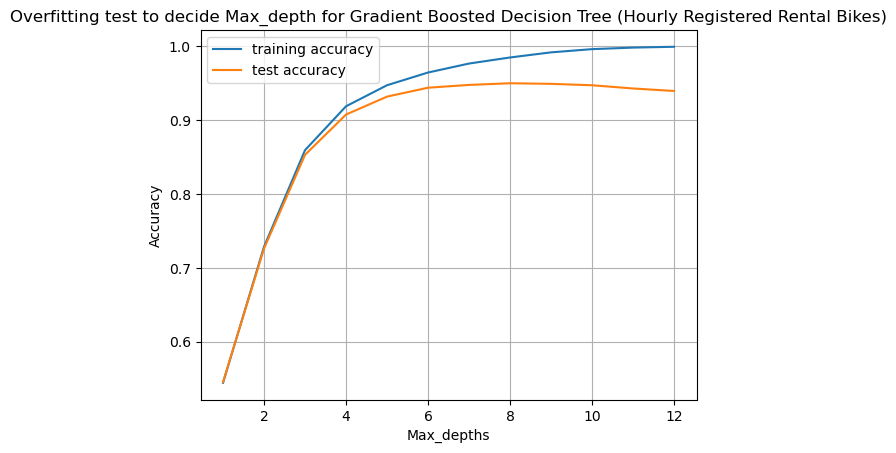

In [343]:
# Determine max_depth for Gradient Boosted Decision Regressor

hour = pd.read_csv('hour.csv')
y = np.array(hour.registered)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth for GradientBoosting
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Hourly Registered Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 8 for GBR

C:\Users\User\AppData\Local\Temp\ipykernel_5276\2169618270.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


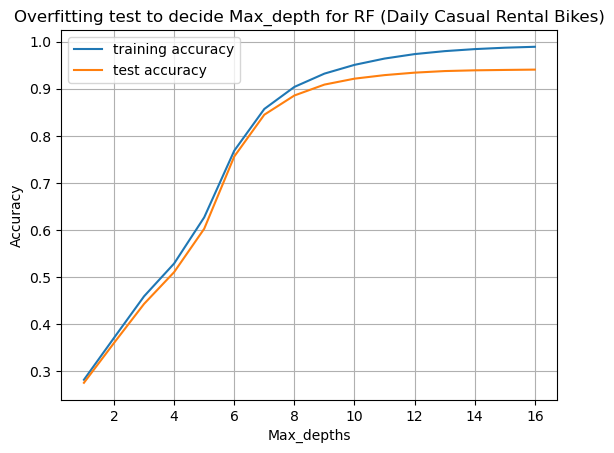

In [346]:
# Determine max_depth for Random Forest Regressor

hour = pd.read_csv('hour.csv')
y = np.array(hour.registered)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 16
depth_settings = range(1, 17)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 12 for RF

In [349]:
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

hour = pd.read_csv('hour.csv')
y = np.array(hour.registered)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

# Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
R2_LR= r2_score(y_test,y_pred)
Train_acc_LR = reg.score(X_train, y_train)
Test_acc_LR = reg.score(X_test, y_test)
y_pred_LR = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))  # Note: Testing accuracy is also the R2 score

# Ridge Regression
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE_Ridge =np.sqrt(mean_squared_error(y_test,y_pred))
R2_Ridge= r2_score(y_test,y_pred)
Train_acc_Ridge = clf.score(X_train, y_train)
Test_acc_Ridge = clf.score(X_test, y_test)
y_pred_Ridge = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))

# Lasso Regression
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
RMSE_Lasso=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Lasso=r2_score(y_test,y_pred)
Train_acc_Lasso = cld.score(X_train, y_train)
Test_acc_Lasso = cld.score(X_test, y_test)
y_pred_Lasso = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))

# ElasticNet Regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE_Elastic=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Elastic=r2_score(y_test,y_pred)
Train_acc_Elastic = regr.score(X_train, y_train)
Test_acc_Elastic = regr.score(X_test, y_test)
y_pred_Elastic = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))

#GB regressor with max_depth = 8
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 12
forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1830758093.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


RMSE_LR= 120.31893016761731
R2_LR= 0.33609999806006086
RMSE_Ridge= 120.3231151576156
R2_Ridge= 0.33605381308843285
RMSE_Lasso= 120.35356058977175
R2_Lasso= 0.33571777315198015
RMSE_Elastic= 129.4022361002512
R2_Elastic= 0.23207587988635037
RMSE_GBR= 32.9791429960022
R2_GBR= 0.9501214892407811
RMSE_RF= 37.92834404225237
R2_RF= 0.9340275655839222


In [350]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
Train_acc = [Train_acc_LR,Train_acc_Ridge,Train_acc_Lasso,Train_acc_Elastic,Train_acc_GBR,Train_acc_RF]
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
Metrics_df_case5 = pd.DataFrame(list(zip(Model, Train_acc,RMSE,R2)),
                          columns =['Model', 'Training accuracy','RMSE','R2'])
Metrics_df_case5
Metrics_df_case5['Training accuracy']=np.round(Metrics_df_case5['Training accuracy'],4)
Metrics_df_case5['RMSE']=np.round(Metrics_df_case5['RMSE'],2)
Metrics_df_case5['R2']=np.round(Metrics_df_case5['R2'],2)
Metrics_df_case5

,Model,Training accuracy,RMSE,R2
0,MLR,0.3349,120.32,0.34
1,Ridge,0.3349,120.32,0.34
2,Lasso,0.3348,120.35,0.34
3,Elastic,0.2347,129.40,0.23
4,GBR,0.9851,32.98,0.95
5,RF,0.9735,37.93,0.93


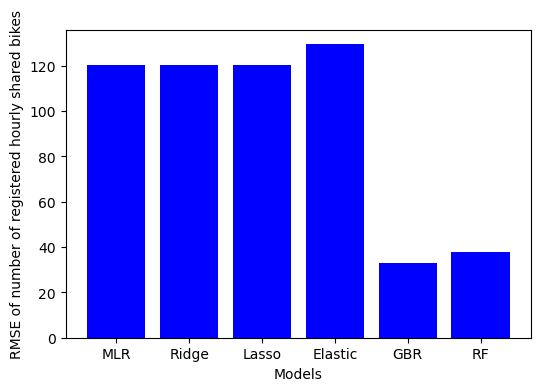

In [351]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of number of registered hourly shared bikes")
plt.xlabel("Models");

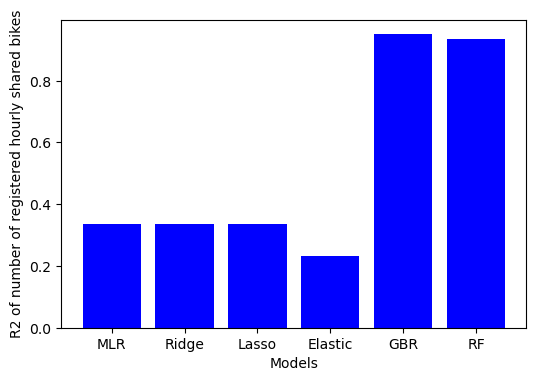

In [352]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,R2, color ='blue')
plt.ylabel("R2 of number of registered hourly shared bikes")
plt.xlabel("Models");

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1843488014.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


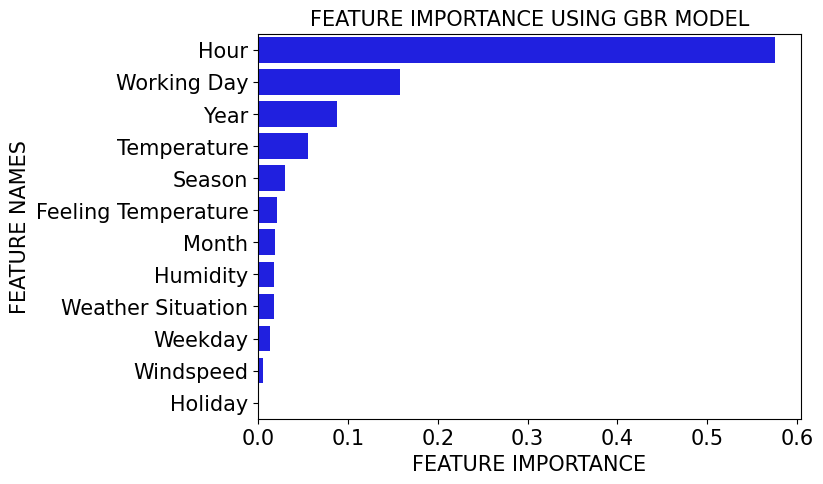

In [353]:
#Feature Importance using GBR Model (GBR with max_depth = 8)
hour = pd.read_csv('hour.csv')
y = np.array(hour.registered)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)

# plot the feature importances:

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(GBR.feature_importances_, X_cols_proper_name,'GBR') 

C:\Users\User\AppData\Local\Temp\ipykernel_5276\413400211.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


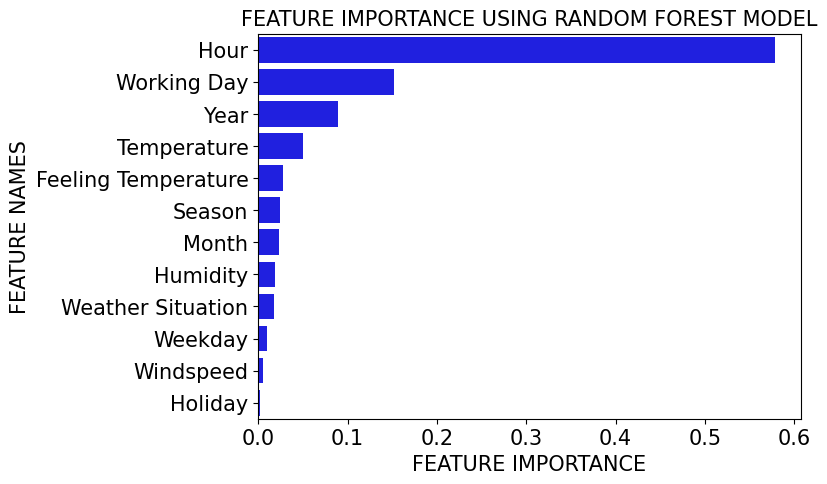

In [354]:
#Feature Importance using RF Model (RF with max_depth = 12)
hour = pd.read_csv('hour.csv')
y = np.array(hour.registered)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(forest.feature_importances_, X_cols_proper_name,'RANDOM FOREST')

In [356]:
X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case5_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case5_GBR = df_feat_imp_case5_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C5_GBR'})
#df_feat_imp_case5_GBR
df_feat_imp_case5_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case5_RF = df_feat_imp_case5_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C5_RF'})
#df_feat_imp_case5_RF
df_feat_imp_case5_comb = pd.merge(df_feat_imp_case5_GBR,df_feat_imp_case5_RF,on = "Feature", how ='outer')
df_feat_imp_case5_comb = df_feat_imp_case5_comb.fillna(0)
df_feat_imp_case5_comb

,Feature,Feature Importance_C5_GBR,Feature Importance_C5_RF
0,Season,0.029553,0.024257
1,Year,0.088127,0.089528
2,Month,0.018780,0.023815
3,Hour,0.575365,0.578217
4,Holiday,0.001385,0.001980
5,Weekday,0.013034,0.009998
6,Working Day,0.157609,0.152131
7,Weather Situation,0.017548,0.018154
8,Temperature,0.055134,0.050717
9,Feeling Temperature,0.020461,0.027248


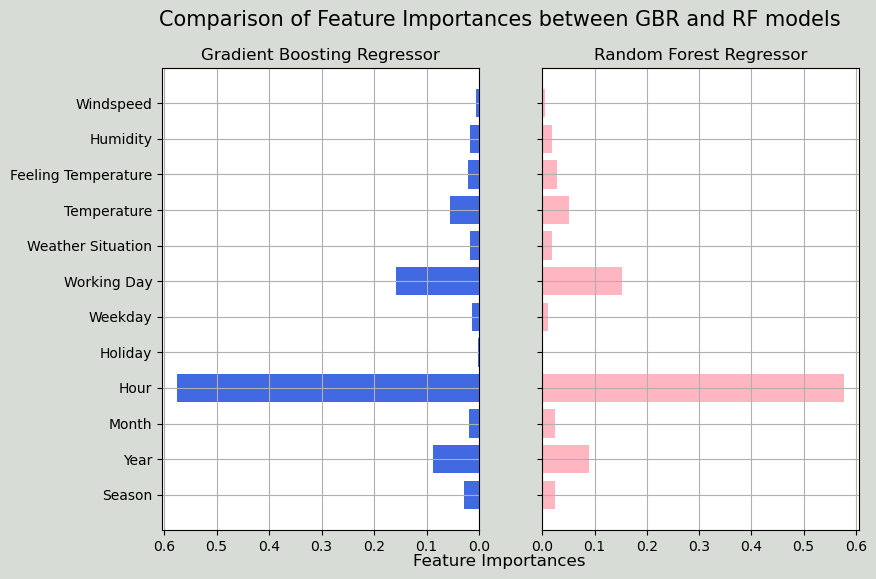

In [357]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case5_comb))
x_male = df_feat_imp_case5_comb['Feature Importance_C5_GBR']
x_female = df_feat_imp_case5_comb['Feature Importance_C5_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case4_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

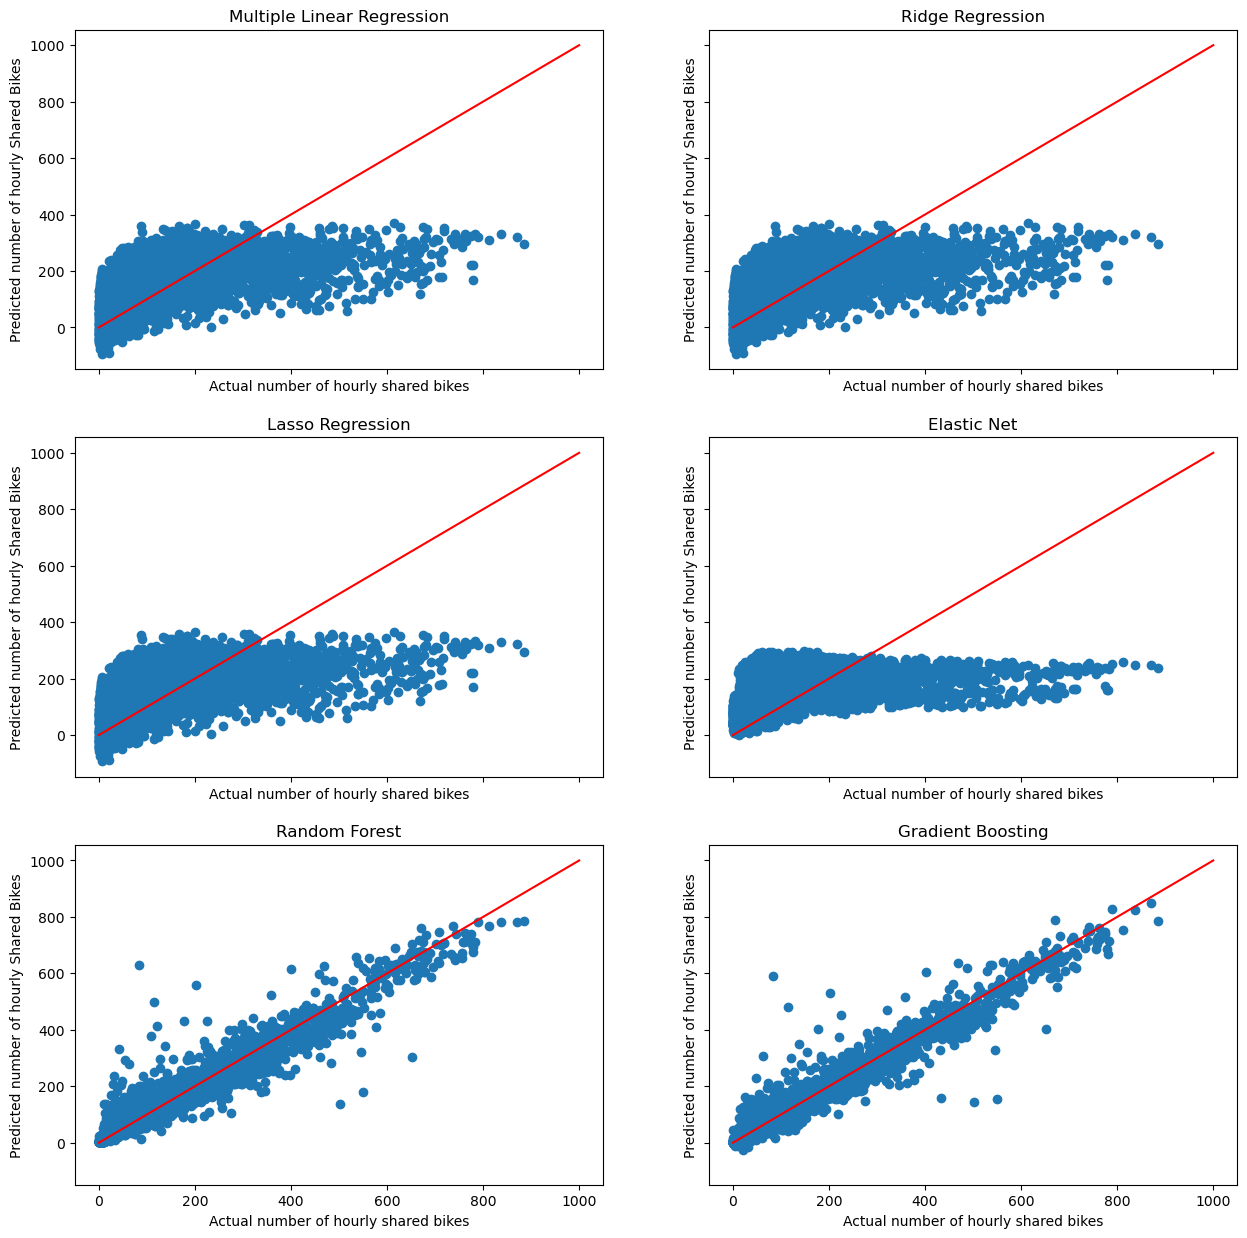

In [360]:
# Predicted vs Observed Plot

fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_LR)
x_45 = [0,1000]
y_45 = [0,1000]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_Ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_Lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_Elastic)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBR)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of hourly shared bikes', ylabel='Predicted number of hourly Shared Bikes')

## CASE 6: Hour, Total

In [7]:
#OLS model
import statsmodels.api as sm
hour = pd.read_csv('hour.csv')
y = hour['cnt']
X = hour.drop(['instant','dteday','registered','casual','cnt'],1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

C:\Users\hasib\AppData\Local\Temp/ipykernel_73624/2732076921.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = hour.drop(['instant','dteday','registered','casual','cnt'],1)
E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     682.6
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:42:47   Log-Likelihood:                -83020.
No. Observations:               13034   AIC:                         1.661e+05
Df Residuals:                   13021   BIC:                         1.662e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.6496      8.140     -2.660      0.008     -37.606      -5.693
season        21.0086      2.079     10.103      0.000      16.933      25.085
yr            79.7390      2.492     31.998      0.000      74.854      84.624
mnth          -0.3639      0.649     -0.561      0.575      -1.636       0.909
hr             7.6062      0.190     40.083      0.000       7.234       7.978
holiday      -24.7601      7.715     -3.209      0.001     -39.884      -9.637
weekday        1.9136      0.622      3.074      0.002       0.693       3.134
workingday     4.2466      2.752      1.543      0.123      -1.148       9.641
weathersit    -4.8460      2.196     -2.207      0.027      -9.151      -0.541
temp          59.9804     42.794      1.402      0.161     -23.903     143.863
atemp        249.4149     48.065      5.189      0.000     155.201     343.629
hum         -198.9872      7.965    -24.983      0.000    -214.600    -183.375
windspeed     42.4907     11.125      3.819      0.000      20.685      64.297
==============================================================================
Omnibus:                     2492.438   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4715.937
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       4.760   Cond. No.                         794.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\AppData\Local\Temp\ipykernel_5276\4122074208.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


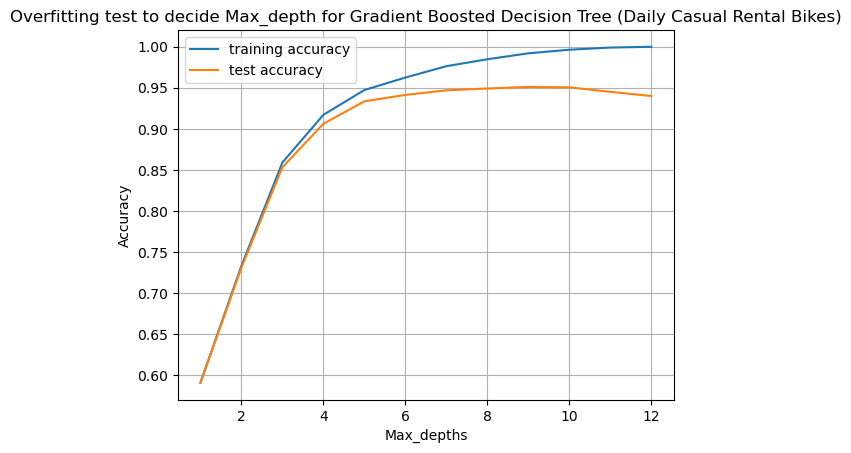

In [363]:
# Determine max_depth for Gradient Boosted Decision Regressor

hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth for GradientBoosting
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 12
depth_settings = range(1, 13)

for n_depth in depth_settings:
    # build the model
    tree = GradientBoostingRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Gradient Boosted Decision Tree (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 8 for GBR

C:\Users\User\AppData\Local\Temp\ipykernel_5276\515032962.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


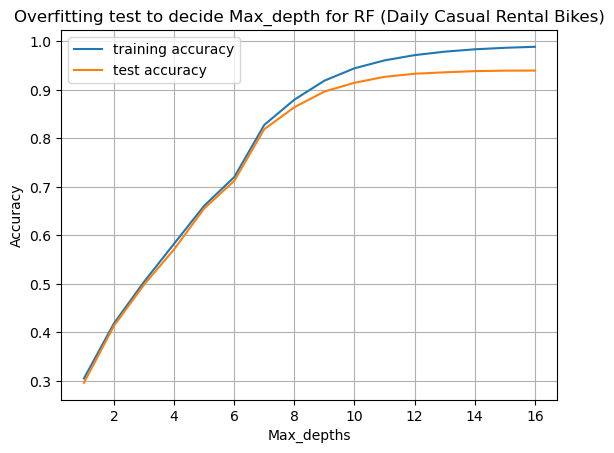

In [364]:
# Determine max_depth for Random Forest Regressor

hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 16
depth_settings = range(1, 17)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for RF (Daily Casual Rental Bikes)");

# Based on testing accuracy, optimum max_depth = 12 for RF

In [376]:
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

# Linear Regression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
RMSE_LR = np.sqrt(mean_squared_error(y_test,y_pred))
R2_LR= r2_score(y_test,y_pred)
Train_acc_LR = reg.score(X_train, y_train)
Test_acc_LR = reg.score(X_test, y_test)
y_pred_LR = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_LR=',(r2_score(y_test,y_pred)))  # Note: Testing accuracy is also the R2 score

# Ridge Regression
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
RMSE_Ridge =np.sqrt(mean_squared_error(y_test,y_pred))
R2_Ridge= r2_score(y_test,y_pred)
Train_acc_Ridge = clf.score(X_train, y_train)
Test_acc_Ridge = clf.score(X_test, y_test)
y_pred_Ridge = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Ridge=',(r2_score(y_test,y_pred)))

# Lasso Regression
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
RMSE_Lasso=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Lasso=r2_score(y_test,y_pred)
Train_acc_Lasso = cld.score(X_train, y_train)
Test_acc_Lasso = cld.score(X_test, y_test)
y_pred_Lasso = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Lasso=',(r2_score(y_test,y_pred)))

# ElasticNet Regression
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
RMSE_Elastic=np.sqrt(mean_squared_error(y_test,y_pred))
R2_Elastic=r2_score(y_test,y_pred)
Train_acc_Elastic = regr.score(X_train, y_train)
Test_acc_Elastic = regr.score(X_test, y_test)
y_pred_Elastic = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_Elastic=',(r2_score(y_test,y_pred)))

#GB regressor with max_depth = 8
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 12
forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3852729718.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


RMSE_LR= 138.70867044124864
R2_LR= 0.3911297680928364
RMSE_Ridge= 138.7138036617539
R2_Ridge= 0.3910847020853271
RMSE_Lasso= 138.7461310420862
R2_Lasso= 0.39080085246593066
RMSE_Elastic= 153.86810080590132
R2_Elastic= 0.2507707733580564
RMSE_GBR= 40.151250718450214
R2_GBR= 0.948982910333638
RMSE_RF= 45.95911236942852
R2_RF= 0.9331562527358628


In [377]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
Train_acc = [Train_acc_LR,Train_acc_Ridge,Train_acc_Lasso,Train_acc_Elastic,Train_acc_GBR,Train_acc_RF]
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
Metrics_df_case5 = pd.DataFrame(list(zip(Model, Train_acc,RMSE,R2)),
                          columns =['Model', 'Training accuracy','RMSE','R2'])
Metrics_df_case5
Metrics_df_case5['Training accuracy']=np.round(Metrics_df_case5['Training accuracy'],4)
Metrics_df_case5['RMSE']=np.round(Metrics_df_case5['RMSE'],2)
Metrics_df_case5['R2']=np.round(Metrics_df_case5['R2'],2)
Metrics_df_case5

,Model,Training accuracy,RMSE,R2
0,MLR,0.3878,138.71,0.39
1,Ridge,0.3878,138.71,0.39
2,Lasso,0.3877,138.75,0.39
3,Elastic,0.2559,153.87,0.25
4,GBR,0.9845,40.15,0.95
5,RF,0.9715,45.96,0.93


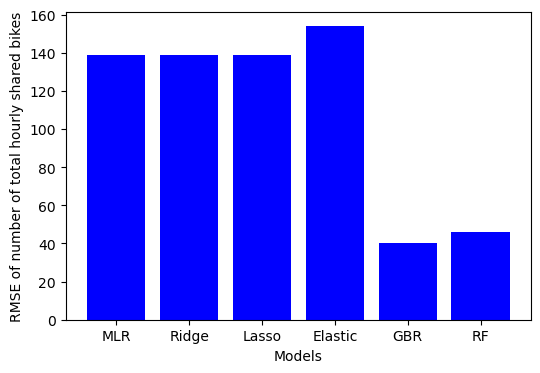

In [378]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
RMSE = [RMSE_LR,RMSE_Ridge,RMSE_Lasso,RMSE_Elastic,RMSE_GBR,RMSE_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of number of total hourly shared bikes")
plt.xlabel("Models");

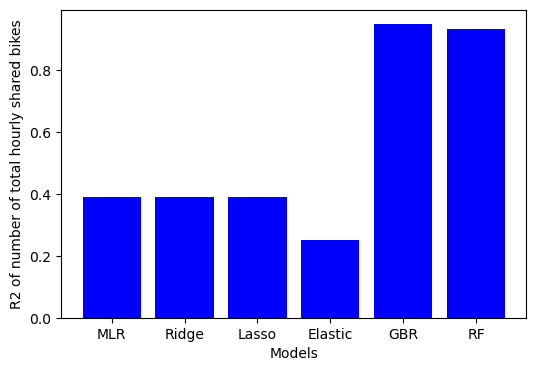

In [379]:
Model = ['MLR','Ridge','Lasso','Elastic','GBR','RF']
R2 = [R2_LR,R2_Ridge,R2_Lasso,R2_Elastic,R2_GBR,R2_RF]
plt.figure(figsize=(6,4))
plt.bar(Model,R2, color ='blue')
plt.ylabel("R2 of number of total hourly shared bikes")
plt.xlabel("Models");

C:\Users\User\AppData\Local\Temp\ipykernel_5276\425185626.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


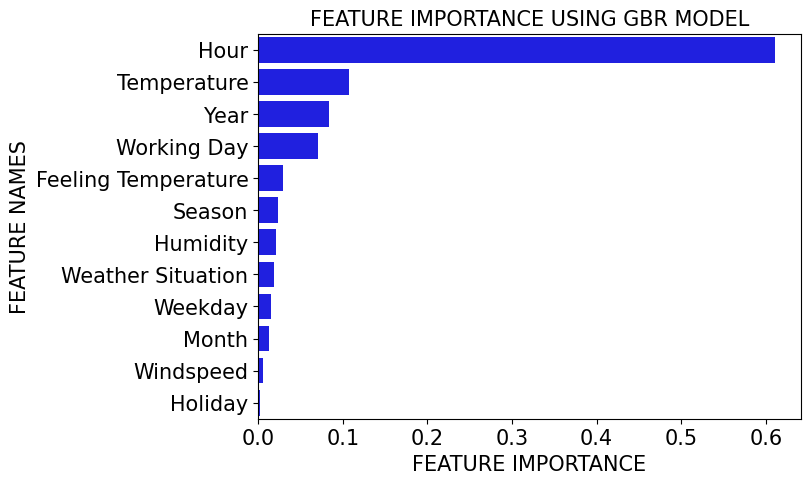

In [380]:
#Feature Importance using GBR Model (GBR with max_depth = 8)
hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)

# plot the feature importances:

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(GBR.feature_importances_, X_cols_proper_name,'GBR') 

C:\Users\User\AppData\Local\Temp\ipykernel_5276\843166544.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)


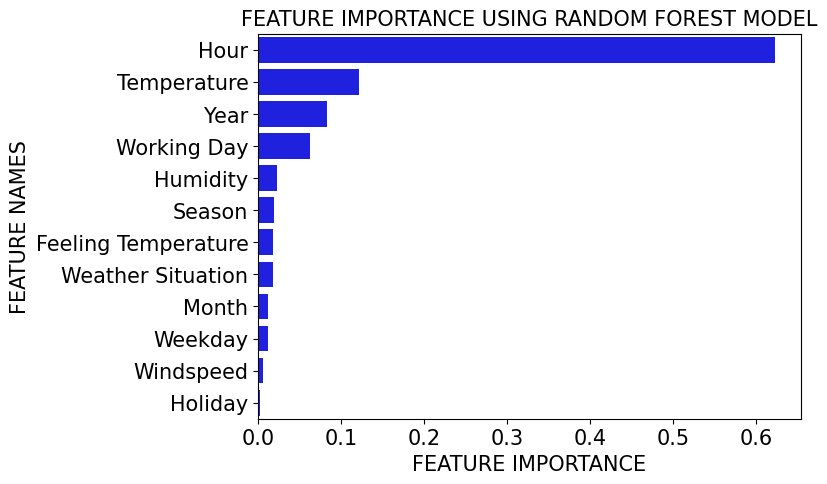

In [381]:
#Feature Importance using RF Model (RF with max_depth = 12)
hour = pd.read_csv('hour.csv')
y = np.array(hour.cnt)
#Drop unnecessary variables
hour.drop(['instant','dteday','registered','casual','cnt'],1,inplace=True)
#Define input variable
X=hour.values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)

def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(7,5))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'],color='blue')
    #Add chart labels
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('FEATURE IMPORTANCE USING '+ model_type+' MODEL',fontsize=15)
    plt.xlabel('FEATURE IMPORTANCE',fontsize=15)
    plt.ylabel('FEATURE NAMES',fontsize=15)

X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']

plot_feature_importance(forest.feature_importances_, X_cols_proper_name,'RANDOM FOREST')

In [382]:
X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case5_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case5_GBR = df_feat_imp_case5_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C5_GBR'})
#df_feat_imp_case5_GBR
df_feat_imp_case5_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case5_RF = df_feat_imp_case5_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C5_RF'})
#df_feat_imp_case5_RF
df_feat_imp_case5_comb = pd.merge(df_feat_imp_case5_GBR,df_feat_imp_case5_RF,on = "Feature", how ='outer')
df_feat_imp_case5_comb = df_feat_imp_case5_comb.fillna(0)
df_feat_imp_case5_comb

,Feature,Feature Importance_C5_GBR,Feature Importance_C5_RF
0,Season,0.023360,0.019390
1,Year,0.083841,0.083212
2,Month,0.012857,0.012387
3,Hour,0.610668,0.623031
4,Holiday,0.001891,0.002301
5,Weekday,0.015644,0.012349
6,Working Day,0.070226,0.062418
7,Weather Situation,0.018517,0.017756
8,Temperature,0.106997,0.121253
9,Feeling Temperature,0.029873,0.017966


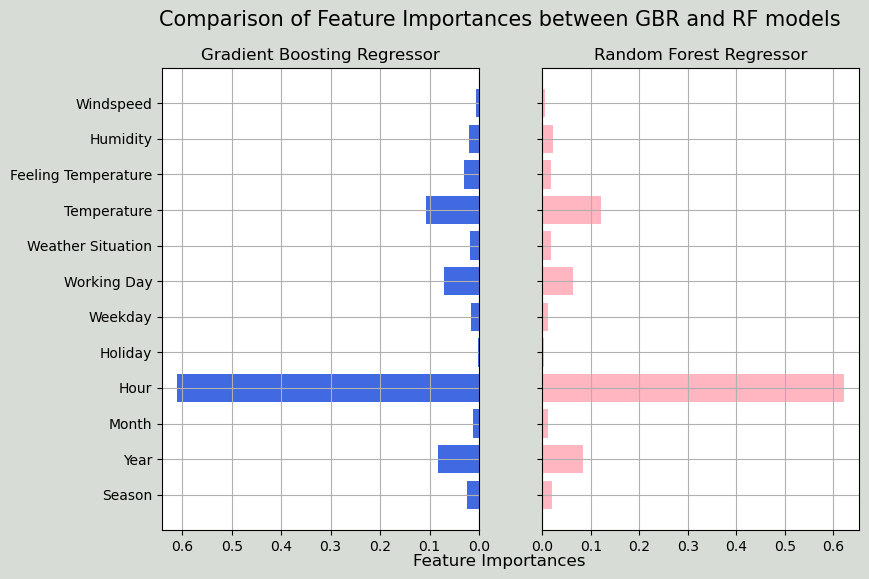

In [383]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case5_comb))
x_male = df_feat_imp_case5_comb['Feature Importance_C5_GBR']
x_female = df_feat_imp_case5_comb['Feature Importance_C5_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case5_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

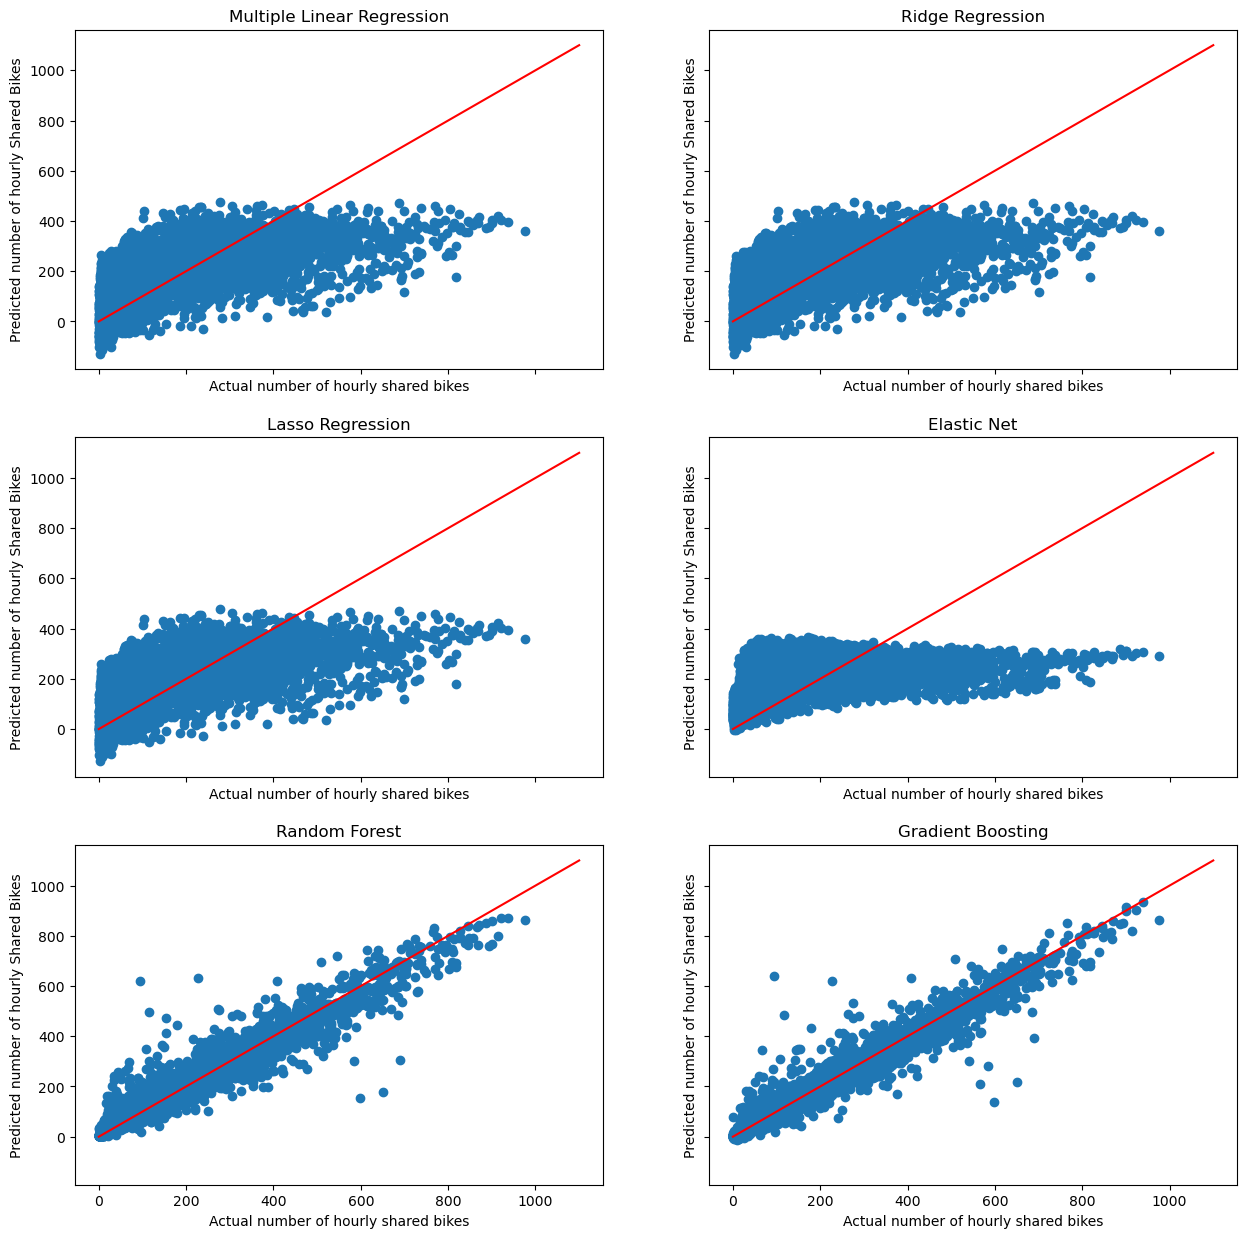

In [388]:
# Predicted vs Observed Plot

fig, axs = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True,figsize=(15, 15))
axs[0,0].scatter(y_test,y_pred_LR)
x_45 = [0,1100]
y_45 = [0,1100]
axs[0, 0].plot(x_45,y_45,'r');
axs[0, 0].set_title('Multiple Linear Regression')
axs[0, 1].scatter(y_test,y_pred_Ridge)
axs[0, 1].plot(x_45,y_45,'r');
axs[0, 1].set_title('Ridge Regression')
axs[1, 0].scatter(y_test,y_pred_Lasso)
axs[1, 0].plot(x_45,y_45,'r');
axs[1, 0].set_title('Lasso Regression')
axs[1, 1].scatter(y_test, y_pred_Elastic)
axs[1, 1].plot(x_45,y_45,'r');
axs[1, 1].set_title('Elastic Net')
axs[2, 0].scatter(y_test, y_pred_RF)
axs[2, 0].plot(x_45,y_45,'r');
axs[2, 0].set_title('Random Forest')
axs[2, 1].plot(x_45,y_45,'r');
axs[2, 1].scatter(y_test, y_pred_GBR)
axs[2, 1].set_title('Gradient Boosting')

for ax in axs.flat:
    ax.set(xlabel='Actual number of hourly shared bikes', ylabel='Predicted number of hourly Shared Bikes')

In [401]:
# Based on the above results and R2 value for each case, the best models are:
'''
Case 1: Day, Casual: GBR 
Case 2: Day, Registered:GBR
Case 3: Day, Total:GBR
Case 4: Hour, Casual: GBR
Case 5: Hour, Registered:GBR
Case 6: Hour, Total: GBR
GBR is the best, while RF is closely following second place
'''

'\nCase 1: Day, Casual \nCase 2: Day, Registered\nCase 3: Day, Total\nCase 4: Hour, Casual\nCase 5: Hour, Registered\nCase 6: Hour, Total\n\n'

## Analysis of Event and Not-event files Case 7 and Case 8)

In [402]:
'''
#Event dates:
2012-10-29
2012-10-30
2012-10-19
2012-7-4
2012-11-23
2012-12-24
2012-10-8
2012-5-27
2012-11-22
2012-11-12
2012-4-16
2012-3-23
2012-9-18
2012-7-18
2012-6-1
2012-12-4
2012-5-13
2012-2-11
2012-1-23
2012-9-29
2012-11-25
2012-10-7
2012-4-7
2012-5-26
2012-5-21
2012-9-15
2012-10-11
2012-10-12
2012-1-29
2012-5-19
'''

'\n#Event dates:\n2012-10-29\n2012-10-30\n2012-10-19\n2012-7-4\n2012-11-23\n2012-12-24\n2012-10-8\n2012-5-27\n2012-11-22\n2012-11-12\n2012-4-16\n2012-3-23\n2012-9-18\n2012-7-18\n2012-6-1\n2012-12-4\n2012-5-13\n2012-2-11\n2012-1-23\n2012-9-29\n2012-11-25\n2012-10-7\n2012-4-7\n2012-5-26\n2012-5-21\n2012-9-15\n2012-10-11\n2012-10-12\n2012-1-29\n2012-5-19\n'

In [403]:
#Dividing the data:
event_dates = ["2012-10-29",
"2012-10-30",
"2012-10-19",
"2012-7-4",
"2012-11-23",
"2012-12-24",
"2012-10-8",
"2012-5-27",
"2012-11-22",
"2012-11-12",
"2012-4-16",
"2012-3-23",
"2012-9-18",
"2012-7-18",
"2012-6-1",
"2012-12-4",
"2012-5-13",
"2012-2-11",
"2012-1-23",
"2012-9-29",
"2012-11-25",
"2012-10-7",
"2012-4-7",
"2012-5-26",
"2012-5-21",
"2012-9-15",
"2012-10-11",
"2012-10-12",
"2012-1-29",
"2012-5-19"]

event_dates

['2012-10-29',
 '2012-10-30',
 '2012-10-19',
 '2012-7-4',
 '2012-11-23',
 '2012-12-24',
 '2012-10-8',
 '2012-5-27',
 '2012-11-22',
 '2012-11-12',
 '2012-4-16',
 '2012-3-23',
 '2012-9-18',
 '2012-7-18',
 '2012-6-1',
 '2012-12-4',
 '2012-5-13',
 '2012-2-11',
 '2012-1-23',
 '2012-9-29',
 '2012-11-25',
 '2012-10-7',
 '2012-4-7',
 '2012-5-26',
 '2012-5-21',
 '2012-9-15',
 '2012-10-11',
 '2012-10-12',
 '2012-1-29',
 '2012-5-19']

In [ ]:
day_df = pd.read_csv('day.csv')
hr_df = pd.read_csv('hour.csv')
day_event = day_df[day_df['dteday'].isin(event_dates)]
day_event.to_csv('./data/day_event.csv',index=False)
hr_event = hr_df[hr_df['dteday'].isin(event_dates)]
hr_event.to_csv('./data/hr_event.csv',index=False)
day_not_event = day_df[~day_df['dteday'].isin(event_dates)]
day_not_event.shape
day_not_event.to_csv('./data/day_not_event.csv',index=False)
hr_not_event = hr_df[~hr_df['dteday'].isin(event_dates)]
hr_not_event.shape
hr_not_event.to_csv('./data/hr_not_event.csv',index=False)

In [409]:
# Importing the files
df_event = pd.read_csv("hr_event.csv")
df_not_event = pd.read_csv("hr_not_event.csv")


In [408]:
df_event.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [410]:
# Hourly event file
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

df_event = pd.read_csv("hr_event.csv")
y = np.array(df_event.cnt)
#Define input variable
X=df_event.drop(['instant','dteday','registered','casual','cnt'],1).values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#GB regressor with max_depth = 8
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 12
forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\3243047192.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_event.drop(['instant','dteday','registered','casual','cnt'],1).values


RMSE_GBR= 128.06453257725676
R2_GBR= 0.6327399275367585
RMSE_RF= 123.46522904995993
R2_RF= 0.6586457526194013


In [411]:
X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case7_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case7_GBR = df_feat_imp_case7_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C7_GBR'})
#df_feat_imp_case7_GBR
df_feat_imp_case7_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case7_RF = df_feat_imp_case7_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C7_RF'})
#df_feat_imp_case7_RF
df_feat_imp_case7_comb = pd.merge(df_feat_imp_case7_GBR,df_feat_imp_case7_RF,on = "Feature", how ='outer')
df_feat_imp_case7_comb = df_feat_imp_case7_comb.fillna(0)
df_feat_imp_case7_comb

,Feature,Feature Importance_C7_GBR,Feature Importance_C7_RF
0,Season,0.000141,0.000336
1,Year,0.000000,0.000000
2,Month,0.007062,0.012747
3,Hour,0.377982,0.338481
4,Holiday,0.001240,0.002496
5,Weekday,0.001265,0.011801
6,Working Day,0.001486,0.002725
7,Weather Situation,0.001702,0.004155
8,Temperature,0.146346,0.242931
9,Feeling Temperature,0.335048,0.237813


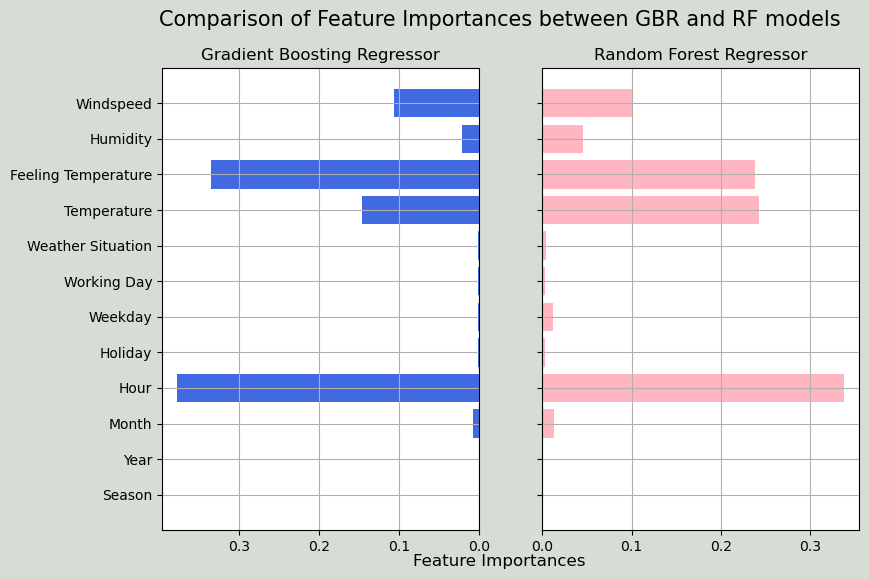

In [412]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case7_comb))
x_male = df_feat_imp_case7_comb['Feature Importance_C7_GBR']
x_female = df_feat_imp_case7_comb['Feature Importance_C7_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case7_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()

In [413]:
# Hourly non-event file
# Calculate different attributes of the models
# RMSE, R2, training accuracy, predicted values are calculated for each model

df_not_event = pd.read_csv("hr_not_event.csv")
y = np.array(df_not_event.cnt)
#Define input variable
X=df_not_event.drop(['instant','dteday','registered','casual','cnt'],1).values
#Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)

#GB regressor with max_depth = 8
GBR = GradientBoostingRegressor(n_estimators=100,max_depth=8, random_state=6608)
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
RMSE_GBR=np.sqrt(mean_squared_error(y_test,y_pred))
R2_GBR=r2_score(y_test,y_pred)
Train_acc_GBR = GBR.score(X_train, y_train)
Test_acc_GBR = GBR.score(X_test, y_test)
y_pred_GBR = GBR.predict(X_test)
#Check Accuracy
print('RMSE_GBR=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_GBR=',(r2_score(y_test,y_pred)))

# RF regressor with max_depth = 12
forest = RandomForestRegressor(n_estimators=100,max_depth=12, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
RMSE_RF=np.sqrt(mean_squared_error(y_test,y_pred))
R2_RF=r2_score(y_test,y_pred)
Train_acc_RF = forest.score(X_train, y_train)
Test_acc_RF = forest.score(X_test, y_test)
y_pred_RF = forest.predict(X_test)
#Get the accuracy score
print('RMSE_RF=',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_RF=',(r2_score(y_test,y_pred)))

C:\Users\User\AppData\Local\Temp\ipykernel_5276\1001022406.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_not_event.drop(['instant','dteday','registered','casual','cnt'],1).values


RMSE_GBR= 40.06871209353153
R2_GBR= 0.9520097443723393
RMSE_RF= 45.750576317277705
R2_RF= 0.9374344257587328


In [414]:
X_cols_proper_name = ['Season','Year','Month','Hour','Holiday','Weekday','Working Day',
                      'Weather Situation','Temperature','Feeling Temperature','Humidity','Windspeed']
df_feat_imp_case8_GBR = pd.DataFrame(GBR.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case8_GBR = df_feat_imp_case8_GBR.rename(columns={'index': 'Feature', 0: 'Feature Importance_C8_GBR'})
#df_feat_imp_case8_GBR
df_feat_imp_case8_RF = pd.DataFrame(forest.feature_importances_,X_cols_proper_name).reset_index()
df_feat_imp_case8_RF = df_feat_imp_case8_RF.rename(columns={'index': 'Feature', 0: 'Feature Importance_C8_RF'})
#df_feat_imp_case8_RF
df_feat_imp_case8_comb = pd.merge(df_feat_imp_case8_GBR,df_feat_imp_case8_RF,on = "Feature", how ='outer')
df_feat_imp_case8_comb = df_feat_imp_case8_comb.fillna(0)
df_feat_imp_case8_comb

,Feature,Feature Importance_C8_GBR,Feature Importance_C8_RF
0,Season,0.024529,0.021762
1,Year,0.084122,0.081121
2,Month,0.012253,0.011967
3,Hour,0.613688,0.634596
4,Holiday,0.001676,0.001605
5,Weekday,0.012576,0.010082
6,Working Day,0.073148,0.059591
7,Weather Situation,0.019721,0.019209
8,Temperature,0.105940,0.119556
9,Feeling Temperature,0.029865,0.016180


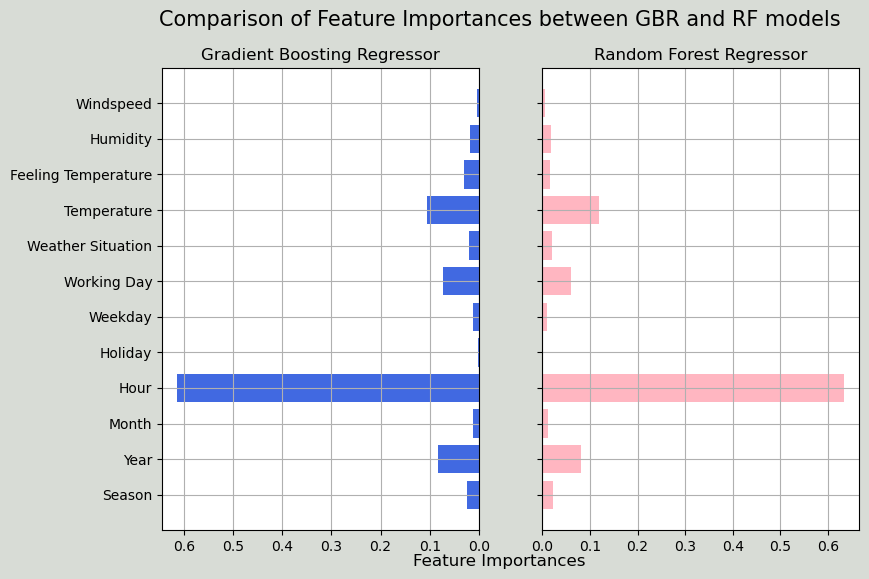

In [415]:
# Feature importance plot considering both ML models
# Source: https://www.statology.org/population-pyramid-python/

#define x and y limits
y = range(0, len(df_feat_imp_case8_comb))
x_male = df_feat_imp_case8_comb['Feature Importance_C8_GBR']
x_female = df_feat_imp_case8_comb['Feature Importance_C8_RF']

#define plot parameters
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(9, 6))

#specify background color and plot title
fig.patch.set_facecolor('xkcd:light grey')
plt.figtext(0.5,0.95,"Comparison of Feature Importances between GBR and RF models", 
            fontsize=15, ha='center')
plt.figtext(0.5,0.05,"Feature Importances", 
            fontsize=12, ha='center')
    
#define male and female bars
axes[0].barh(y, x_male, align='center', color='royalblue')
axes[0].set(title='Gradient Boosting Regressor')
axes[1].barh(y, x_female, align='center', color='lightpink')
axes[1].set(title='Random Forest Regressor')

#adjust grid parameters and specify labels for y-axis
axes[1].grid()
axes[0].set(yticks=y, yticklabels=df_feat_imp_case8_comb['Feature'])
axes[0].invert_xaxis()
axes[0].grid()

#display plot
plt.show()